#Imports

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("max_colwidth", 180)

import json
import glob

from sklearn import metrics
from sklearn.metrics import cohen_kappa_score, accuracy_score, balanced_accuracy_score, matthews_corrcoef

from statsmodels.stats.inter_rater import fleiss_kappa, aggregate_raters

!pip install pycm
from pycm import *

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.style.use("seaborn-talk")

In [ ]:
def load_data(file_path, indx = True, indx_col = 0):
  '''Parameters:
  file_path: path to your excel or csv file with data,

  indx: boolean - whether there is index column in your file (usually it is the first column) --> *by default it is set to True
  
  indx_col: int - if your file has an index column, specify column number here --> *by default it is equal to 0 (first column)
  '''
  if indx == True and file_path.endswith(".xlsx"):
    data = pd.read_excel(file_path, index_col = indx_col)
  elif indx == False and file_path.endswith(".xlsx"):
    data = pd.read_excel(file_path)

  elif indx == True and file_path.endswith(".csv"):
    data = pd.read_csv(file_path, index_col = indx_col)
  elif indx == False and file_path.endswith(".csv"):
    data = pd.read_csv(file_path)
  return data


# Retrieve data from json

In [ ]:
# take a look at json map structure

from pprint import pprint

f = open("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/Julia/24448.json")
map0 = json.load(f)
f.close()
pprint(map0)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
                   'x': 600,
                   'y': 1615},
            'visible': True},
           {'from': {'color': 'b',
                     'cqdesc': {},
                     'descriptors': {},
                     'h': 30,
                     'id': 120,
                     'imgurl': '',
                     'participantID': '0',
                     'scheme': '0',
                     'text': 'TRUMP : We lose to everybody',
                     'type': 'L',
                     'visible': True,
                     'w': 180,
                     'x': 1002,
                     'y': 1604},
            'to': {'color': 'y',
                   'cqdesc': {},
                   'descriptors': {'s_AssertContent': '-',
                                   's_AssertLocution': '-'},
                   'h': 30,
                   'id': 121,
                   'imgurl': '',
                   'participantID': '0',
            

In [ ]:
# specific for pathotic schemes

def conclusionPremiseDict(premises, conclusions):
    pairs = {}
    for i, x in enumerate(conclusions):
        pairs[i] = {'conclusion':x, 'premises':[]}
        id_to = x['from']['id']
        for p in premises:
            if p['to']['id'] == id_to:
                pairs[i]['premises'].append(p)                
    return pairs

def aduPairs(edgePairs, nodesById):
    aduPair = []
    for pair in edgePairs.values():
        for p in pair['premises']:
          aduPair.append([nodesById[pair['conclusion']['to']['id']]['text'], nodesById[p['from']['id']]['text']])    
    return aduPair

def pairs(map):
    with open(map) as f:
        data = json.loads(f.read())
    nodesById = {}
    for _, node in enumerate(data['nodes']):
        nodesById[node['id']] = node
        
    premises = [x for x in data['edges'] if nodesById[x['from']['id']]['type'] == 'I' and nodesById[x['to']['id']]['type'] == 'RA']

    conclusions = [x for x in data['edges'] if nodesById[x['from']['id']]['type'] == 'RA' and nodesById[x['to']['id']]['type'] == 'I']
    edgePairs = conclusionPremiseDict(premises, conclusions)
    adus = aduPairs(edgePairs, nodesById)
    return adus, conclusions, premises, nodesById    

truePairs = []
conclusions = []
premises = []
nodesById = {}

map_number = []

for i, m in enumerate(maps):
    adus, c, p, n = pairs(m)
    truePairs.extend(adus)
    conclusions.extend(c)
    premises.extend(p)
    nodesById = {**nodesById, **n}
    for num in range(len(adus)):
      map_number.append(maps[i][-10:-5])          ########   check if only number stays in json path !!!!!

In [ ]:
df = pd.DataFrame(truePairs)
df.columns = ["conclusion", "premise"]
df["map_ID"] = map_number
print(df.shape)
df

(766, 3)


,conclusion,premise,map_ID
0,Mirosław Piotrowski jako prezydent doprowadzi natychmiast do załagodzenia konfliktów z Unią Europejską,"Mirosław Piotrowski powtarza, że konflikt z Unią Europejską da się załatwić w tydzień, tylko trzeba chcieć",24655
1,Mirosław Piotrowski jako prezydent doprowadzi natychmiast do załagodzenia konfliktów z Unią Europejską,Mirosław Piotrowski chce załatwić konflikt z Unią Europejską,24655
2,mamy jako Polska potencjał w sektorze rolniczym,"jest taki koncern przemysłowo spożywczy, zagraniczny, działający tutaj w Polsce który ma przychodu więcej niż cały budżet Polski",24650
3,powinniśmy stawiać na super nowoczesną technologię rolniczą,w Polsce nie mamy na razie tryskającej ropy,24650
4,powinniśmy stawiać na super nowoczesną technologię rolniczą,w Polsce nie mamy złota ani kopalni diamentów,24650
...,...,...,...
761,end of story,CLINTON 's going to raise taxes big league,24757
762,end of story,TRUMP 's going to cut taxes big league,24757
763,"CLINTON has taken the home page of CLINTON's website , HillaryClinton.com , and CLINTON has turned it into a fact-checker",CLINTON kind of assumed that there would be a lot of these charges and claims,24757
764,What CLINTON has proposed would be paid for by raising taxes on the wealthy,they have made all the gains in the economy,24757


In [ ]:
df[df.duplicated(['conclusion', 'premise', 'map_ID'])].shape

(0, 3)

In [ ]:
df["scheme_name"] = ''
df["scheme_aifdb_ID"] = ''

for i, p in enumerate(premises):
  for i2, p2 in enumerate(conclusions):
    for arg_id in df.index:
      if premises[i]['to']['id'] == conclusions[i2]['from']['id'] and premises[i]['from']['text'] == df.loc[arg_id, "premise"] and conclusions[i2]['to']['text']  == df.loc[arg_id, "conclusion"]:
        df.loc[arg_id, "scheme_name"] = premises[i]['to']['text']
        df.loc[arg_id, "scheme_aifdb_ID"] = premises[i]['to']['scheme']

In [ ]:
df["annotator_id"] = 1
df

,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id
0,Mirosław Piotrowski jako prezydent doprowadzi natychmiast do załagodzenia konfliktów z Unią Europejską,"Mirosław Piotrowski powtarza, że konflikt z Unią Europejską da się załatwić w tydzień, tylko trzeba chcieć",24655,Positive Consequences,27,1
1,Mirosław Piotrowski jako prezydent doprowadzi natychmiast do załagodzenia konfliktów z Unią Europejską,Mirosław Piotrowski chce załatwić konflikt z Unią Europejską,24655,Positive Consequences,27,1
2,mamy jako Polska potencjał w sektorze rolniczym,"jest taki koncern przemysłowo spożywczy, zagraniczny, działający tutaj w Polsce który ma przychodu więcej niż cały budżet Polski",24650,Default Inference,72,1
3,powinniśmy stawiać na super nowoczesną technologię rolniczą,w Polsce nie mamy na razie tryskającej ropy,24650,Default Inference,72,1
4,powinniśmy stawiać na super nowoczesną technologię rolniczą,w Polsce nie mamy złota ani kopalni diamentów,24650,Default Inference,72,1
...,...,...,...,...,...,...
761,end of story,CLINTON 's going to raise taxes big league,24757,Default Inference,72,1
762,end of story,TRUMP 's going to cut taxes big league,24757,Default Inference,72,1
763,"CLINTON has taken the home page of CLINTON's website , HillaryClinton.com , and CLINTON has turned it into a fact-checker",CLINTON kind of assumed that there would be a lot of these charges and claims,24757,Default Inference,72,1
764,What CLINTON has proposed would be paid for by raising taxes on the wealthy,they have made all the gains in the economy,24757,Default Inference,72,1


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   conclusion       766 non-null    object
 1   premise          766 non-null    object
 2   map_ID           766 non-null    object
 3   scheme_name      766 non-null    object
 4   scheme_aifdb_ID  766 non-null    object
 5   annotator_id     766 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 36.0+ KB


# Recoding scheme IDs

### Argument Schemes - 8 instances

0  Default Inference \
1  Argument from Positive Consequences (APC),  \
2  Argument from Negative Consequences (ANC), \
3  Argument from Fear Appeal (AFA), \
4  Argument from Danger Appeal (ADA),\
5  Argument from Threat (AT),\
6  Slippery Slope Argument (SSA),\
7  Argument from Waste (AW),\
8  Argument from Need for Help (ANH), \
0 others

In [ ]:
recode_scheme_labels = {'Default Inference':0, 
                        'Positive Consequences':1, 'Negative Consequences':2, 
                        'Fear Appeal':3, 'Danger Appeal':4, 'Threat':5, 
                        'Causal Slippery Slope':6, 'Waste':7, 'Need For Help': 8, 
                        'Example':0, 'Popular Opinion':0}

df["scheme_label"] = df.scheme_name.map(recode_scheme_labels).apply(int)
df

,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label
0,Mirosław Piotrowski jako prezydent doprowadzi natychmiast do załagodzenia konfliktów z Unią Europejską,"Mirosław Piotrowski powtarza, że konflikt z Unią Europejską da się załatwić w tydzień, tylko trzeba chcieć",24655,Positive Consequences,27,1,1
1,Mirosław Piotrowski jako prezydent doprowadzi natychmiast do załagodzenia konfliktów z Unią Europejską,Mirosław Piotrowski chce załatwić konflikt z Unią Europejską,24655,Positive Consequences,27,1,1
2,mamy jako Polska potencjał w sektorze rolniczym,"jest taki koncern przemysłowo spożywczy, zagraniczny, działający tutaj w Polsce który ma przychodu więcej niż cały budżet Polski",24650,Default Inference,72,1,0
3,powinniśmy stawiać na super nowoczesną technologię rolniczą,w Polsce nie mamy na razie tryskającej ropy,24650,Default Inference,72,1,0
4,powinniśmy stawiać na super nowoczesną technologię rolniczą,w Polsce nie mamy złota ani kopalni diamentów,24650,Default Inference,72,1,0
...,...,...,...,...,...,...,...
761,end of story,CLINTON 's going to raise taxes big league,24757,Default Inference,72,1,0
762,end of story,TRUMP 's going to cut taxes big league,24757,Default Inference,72,1,0
763,"CLINTON has taken the home page of CLINTON's website , HillaryClinton.com , and CLINTON has turned it into a fact-checker",CLINTON kind of assumed that there would be a lot of these charges and claims,24757,Default Inference,72,1,0
764,What CLINTON has proposed would be paid for by raising taxes on the wealthy,they have made all the gains in the economy,24757,Default Inference,72,1,0


#Add columns with original map id


In [ ]:
# add columns with original map id

ak = load_data("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/annotated_schemes_AK.xlsx")
jw = load_data("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/annotated_schemes_JW.xlsx")
ja = load_data("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/annotated_schemes_JA.xlsx")
kp = load_data("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/annotated_schemes_KP.xlsx")
pz = load_data("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/annotated_schemes_PZ.xlsx")

ak.shape

(794, 15)

In [ ]:
ak.head(1)

,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label,Causal Slippery Slope,Danger Appeal,Default Inference,Fear Appeal,Need For Help,Negative Consequences,Positive Consequences,Waste
0,CLINTON has a very robust set of plans,We also have to look at how we help families balance the responsibilities at home and the responsibilities at business,24867,Positive Consequences,27,2,1,0,0,0,0,0,0,1,0


In [ ]:
all_df = pd.concat([ak, jw, ja, kp, pz], axis = 0)
all_df.shape

(3808, 16)

In [ ]:
all_df.reset_index(inplace=True, drop=True)

In [ ]:
all_df.head(1)

,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label,Causal Slippery Slope,Danger Appeal,Default Inference,Fear Appeal,Need For Help,Negative Consequences,Positive Consequences,Waste,Example
0,CLINTON has a very robust set of plans,We also have to look at how we help families balance the responsibilities at home and the responsibilities at business,24867,Positive Consequences,27,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN


In [ ]:
all_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   conclusion             3808 non-null   object 
 1   premise                3808 non-null   object 
 2   map_ID                 3808 non-null   int64  
 3   scheme_name            3808 non-null   object 
 4   scheme_aifdb_ID        3808 non-null   int64  
 5   annotator_id           3808 non-null   float64
 6   scheme_label           3808 non-null   float64
 7   Causal Slippery Slope  3109 non-null   float64
 8   Danger Appeal          3808 non-null   float64
 9   Default Inference      3808 non-null   float64
 10  Fear Appeal            3808 non-null   float64
 11  Need For Help          3808 non-null   float64
 12  Negative Consequences  3808 non-null   float64
 13  Positive Consequences  3808 non-null   float64
 14  Waste                  3052 non-null   float64
dtypes: f

In [ ]:
all_df.fillna(0, inplace=True)

In [ ]:
all_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   conclusion             3808 non-null   object 
 1   premise                3808 non-null   object 
 2   map_ID                 3808 non-null   int64  
 3   scheme_name            3808 non-null   object 
 4   scheme_aifdb_ID        3808 non-null   int64  
 5   annotator_id           3808 non-null   float64
 6   scheme_label           3808 non-null   float64
 7   Causal Slippery Slope  3808 non-null   float64
 8   Danger Appeal          3808 non-null   float64
 9   Default Inference      3808 non-null   float64
 10  Fear Appeal            3808 non-null   float64
 11  Need For Help          3808 non-null   float64
 12  Negative Consequences  3808 non-null   float64
 13  Positive Consequences  3808 non-null   float64
 14  Waste                  3808 non-null   float64
dtypes: f

In [ ]:
numery_map = load_data("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/numery_map.xlsx")
print(numery_map.shape)
numery_map = numery_map.iloc[:, :-1]
numery_map.head(1)

In [ ]:
numery_map.columns = ['annotator', 'annotator_id', 'original_map_ID', 'Link']

In [ ]:
numery_map["map_ID"] = numery_map.Link.apply(lambda x: str(x)[-5:])
numery_map["original_map_ID"] = numery_map.original_map_ID.apply(lambda x: x[-5:])
numery_map.head(1)

In [ ]:
numery_map.reset_index(inplace=True, drop=True)
numery_map.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 389
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   annotator        389 non-null    object 
 1   annotator_id     389 non-null    float64
 2   original_map_ID  389 non-null    object 
 3   Link             389 non-null    object 
 4   map_ID           389 non-null    object 
dtypes: float64(1), object(4)
memory usage: 18.2+ KB


In [ ]:
numery_map["map_ID"] = numery_map["map_ID"].apply(lambda x: pd.to_numeric(x))
numery_map["original_map_ID"] = numery_map["original_map_ID"].apply(lambda x: pd.to_numeric(x))

In [ ]:
merged_annotation = all_df.merge(numery_map, on = ["annotator_id", "map_ID"], how = "inner")
merged_annotation.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 3773
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   conclusion             3774 non-null   object 
 1   premise                3774 non-null   object 
 2   map_ID                 3774 non-null   int64  
 3   scheme_name            3774 non-null   object 
 4   scheme_aifdb_ID        3774 non-null   int64  
 5   annotator_id           3774 non-null   float64
 6   scheme_label           3774 non-null   float64
 7   Causal Slippery Slope  3774 non-null   float64
 8   Danger Appeal          3774 non-null   float64
 9   Default Inference      3774 non-null   float64
 10  Fear Appeal            3774 non-null   float64
 11  Need For Help          3774 non-null   float64
 12  Negative Consequences  3774 non-null   float64
 13  Positive Consequences  3774 non-null   float64
 14  Waste                  3774 non-null   float64
 15  anno

In [ ]:
merged_annotation[merged_annotation.original_map_ID.isna()]

,conclusion,premise,map_ID,scheme_name,scheme_aifdb_ID,annotator_id,scheme_label,Causal Slippery Slope,Danger Appeal,Default Inference,Fear Appeal,Need For Help,Negative Consequences,Positive Consequences,Waste,annotator,original_map_ID,Link


In [ ]:
# 5 times annotated map ids

maps_ids_50 = ['20028',
 '19293',
 '10834',
 '19402',
 '19297',
 '20070',
 '19943',
 '19576',
 '19600',
 '19924',
 '19573',
 '19601',
 '19460',
 '19435',
 '20063',
 '19469',
 '10662',
 '10701',
 '10458',
 '10461',
 '10463',
 '19562',
 '10465',
 '19579',
 '10855',
 '10846',
 '10851',
 '10853',
 '19486',
 '10700',
 '10628',
 '19388',
 '11321',
 '20081',
 '10453',
 '20085',
 '20147',
 '10859',
 '10828',
 '19474',
 '10624',
 '19298',
 '10830',
 '10460',
 '19494',
 '10864',
 '10843',
 '19459',
 '20022',
 '19492']

In [ ]:
maps_ids_50_int = [int(i) for i in maps_ids_50]
len(maps_ids_50_int)

50

In [ ]:
five_annotated_maps = merged_annotation[merged_annotation.original_map_ID.isin(maps_ids_50_int)]
five_annotated_maps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2688 entries, 0 to 3773
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   conclusion             2688 non-null   object 
 1   premise                2688 non-null   object 
 2   map_ID                 2688 non-null   int64  
 3   scheme_name            2688 non-null   object 
 4   scheme_aifdb_ID        2688 non-null   int64  
 5   annotator_id           2688 non-null   float64
 6   scheme_label           2688 non-null   float64
 7   Causal Slippery Slope  2688 non-null   float64
 8   Danger Appeal          2688 non-null   float64
 9   Default Inference      2688 non-null   float64
 10  Fear Appeal            2688 non-null   float64
 11  Need For Help          2688 non-null   float64
 12  Negative Consequences  2688 non-null   float64
 13  Positive Consequences  2688 non-null   float64
 14  Waste                  2688 non-null   float64
 15  anno

In [ ]:
five_annotated_maps.shape

(2688, 18)

In [ ]:
2688 / 5

537.6

In [ ]:
five_annotated_maps.original_map_ID.nunique()

49

In [ ]:
arg_schemes_dummy = ['Causal Slippery Slope', 'Danger Appeal',
       'Default Inference', 'Fear Appeal', 'Need For Help',
       'Negative Consequences', 'Positive Consequences', 'Waste']

In [ ]:
for col in arg_schemes_dummy:
  five_annotated_maps[col] = five_annotated_maps[col].apply(int)

In [ ]:
five_annotated_maps = five_annotated_maps[['annotator', 'annotator_id', 'original_map_ID', 'Link', 'map_ID',
       'conclusion', 'premise', 'scheme_name', 'scheme_aifdb_ID',
       'scheme_label', 'Causal Slippery Slope', 'Danger Appeal',
       'Default Inference', 'Fear Appeal', 'Need For Help',
       'Negative Consequences', 'Positive Consequences', 'Waste']]

In [ ]:
a0 = five_annotated_maps[five_annotated_maps.annotator_id == 0]
a1 = five_annotated_maps[five_annotated_maps.annotator_id == 1]
a2 = five_annotated_maps[five_annotated_maps.annotator_id == 2]
a3 = five_annotated_maps[five_annotated_maps.annotator_id == 3]
a4 = five_annotated_maps[five_annotated_maps.annotator_id == 4]

In [ ]:
a0.shape, a1.shape, a2.shape, a3.shape, a4.shape

((539, 18), (532, 18), (539, 18), (539, 18), (539, 18))

In [ ]:
a0.original_map_ID.nunique(), a1.original_map_ID.nunique(), a2.original_map_ID.nunique(), a3.original_map_ID.nunique(), a4.original_map_ID.nunique()

(49, 49, 49, 49, 49)

In [ ]:
maps_49 = a2.original_map_ID.unique()
len(maps_49)

49

In [ ]:
a0 = a0[a0.original_map_ID.isin(maps_49)]
a1 = a1[a1.original_map_ID.isin(maps_49)]
a2 = a2[a2.original_map_ID.isin(maps_49)]
a3 = a3[a3.original_map_ID.isin(maps_49)]
a4 = a4[a4.original_map_ID.isin(maps_49)]
a0.shape, a1.shape, a2.shape, a3.shape, a4.shape

((539, 18), (532, 18), (539, 18), (539, 18), (539, 18))

In [ ]:
a0.original_map_ID.nunique(), a1.original_map_ID.nunique(), a2.original_map_ID.nunique(), a3.original_map_ID.nunique(), a4.original_map_ID.nunique()

(49, 49, 49, 49, 49)

In [ ]:
numbers = []
conc = []
prem = []

for i1 in a1.index:
  for i2 in a4.index:
    if (a4.loc[i2]['conclusion'] == a1.loc[i1]['conclusion']) and (a4.loc[i2]['premise'] == a1.loc[i1]['premise']):
      numbers.append(i2)
      conc.append(a4.loc[i2]['conclusion'])
      prem.append(a4.loc[i2]['premise'])

len(numbers)

529

In [ ]:
len(conc), len(prem)

(529, 529)

In [ ]:
concl_prem_df = pd.DataFrame({'conclusion':conc, 'premise':prem})
concl_prem_df.head(1)

,conclusion,premise
0,Mirosław Piotrowski jako prezydent doprowadzi natychmiast do załagodzenia konfliktów z Unią Europejską,"Mirosław Piotrowski powtarza, że konflikt z Unią Europejską da się załatwić w tydzień, tylko trzeba chcieć"


In [ ]:
concl_prem_df.shape

(529, 2)

In [ ]:
# repeat for everyone

a00 = a0.merge(concl_prem_df, on = ['conclusion', 'premise'], how = 'inner')
a00.info(verbose=True)       

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 0 to 528
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   conclusion             529 non-null    object 
 1   premise                529 non-null    object 
 2   map_ID                 529 non-null    int64  
 3   scheme_name            529 non-null    object 
 4   scheme_aifdb_ID        529 non-null    int64  
 5   annotator_id           529 non-null    float64
 6   scheme_label           529 non-null    float64
 7   Causal Slippery Slope  529 non-null    int64  
 8   Danger Appeal          529 non-null    int64  
 9   Default Inference      529 non-null    int64  
 10  Fear Appeal            529 non-null    int64  
 11  Need For Help          529 non-null    int64  
 12  Negative Consequences  529 non-null    int64  
 13  Positive Consequences  529 non-null    int64  
 14  Waste                  529 non-null    int64  
 15  annota

In [ ]:
a00.shape, a11.shape, a22.shape, a33.shape, a44.shape

# now it is fine

((529, 18), (529, 18), (529, 18), (529, 18), (529, 18))

In [ ]:
a00.original_map_ID.nunique(), a11.original_map_ID.nunique(), a22.original_map_ID.nunique(), a33.original_map_ID.nunique(), a44.original_map_ID.nunique()

(49, 49, 49, 49, 49)

#Cohen kappa - agreement of pairs of annotators

In [ ]:
scheme_cols = ['Causal Slippery Slope', 'Danger Appeal',
       'Default Inference', 'Fear Appeal', 'Need For Help',
       'Negative Consequences', 'Positive Consequences', 'Waste']
scheme_cols

['Causal Slippery Slope',
 'Danger Appeal',
 'Default Inference',
 'Fear Appeal',
 'Need For Help',
 'Negative Consequences',
 'Positive Consequences',
 'Waste']

##**Binary labels - kappa for each category scheme** 

For k populations, there will be ***k(k-1)/2*** multiple comparisons

In [ ]:
(5*(5-1)) / 2

10.0

annotator 0 compare

In [ ]:
for scheme in scheme_cols:  
  a1 = a00.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # only 0 label Causal Slippery Slope
  a2 = a11.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # only 0 label, so it should be perfect agreement in Causal Slippery Slope
  cohen_k = cohen_kappa_score(a1, a2)
  print(f"Cohen's kappa for  --> {scheme} <--\t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} <--\t {round(accuracy_score(a1, a2), 2)} \n\n")  

Cohen's kappa for  --> Causal Slippery Slope <--	 nan
Accuracy for  --> Causal Slippery Slope <--	 1.0 


Cohen's kappa for  --> Danger Appeal <--	 0.05
Accuracy for  --> Danger Appeal <--	 0.95 


Cohen's kappa for  --> Default Inference <--	 0.37
Accuracy for  --> Default Inference <--	 0.68 


Cohen's kappa for  --> Fear Appeal <--	 0.07
Accuracy for  --> Fear Appeal <--	 0.96 


Cohen's kappa for  --> Need For Help <--	 0.24
Accuracy for  --> Need For Help <--	 0.93 


Cohen's kappa for  --> Negative Consequences <--	 0.33
Accuracy for  --> Negative Consequences <--	 0.77 


Cohen's kappa for  --> Positive Consequences <--	 0.4
Accuracy for  --> Positive Consequences <--	 0.81 


Cohen's kappa for  --> Waste <--	 0.0
Accuracy for  --> Waste <--	 0.99 




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [ ]:
for scheme in scheme_cols:
  a1 = a00.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  a2 = a22.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  cohen_k = cohen_kappa_score(a1, a2)
  print(f"Cohen's kappa for  --> {scheme} <--  \t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} <--\t {round(accuracy_score(a1, a2), 2)} \n\n")  

Cohen's kappa for  --> Causal Slippery Slope <--  	 0.0
Accuracy for  --> Causal Slippery Slope <--	 0.99 


Cohen's kappa for  --> Danger Appeal <--  	 -0.02
Accuracy for  --> Danger Appeal <--	 0.95 


Cohen's kappa for  --> Default Inference <--  	 0.22
Accuracy for  --> Default Inference <--	 0.63 


Cohen's kappa for  --> Fear Appeal <--  	 0.01
Accuracy for  --> Fear Appeal <--	 0.91 


Cohen's kappa for  --> Need For Help <--  	 0.49
Accuracy for  --> Need For Help <--	 0.97 


Cohen's kappa for  --> Negative Consequences <--  	 0.38
Accuracy for  --> Negative Consequences <--	 0.76 


Cohen's kappa for  --> Positive Consequences <--  	 0.39
Accuracy for  --> Positive Consequences <--	 0.74 


Cohen's kappa for  --> Waste <--  	 0.0
Accuracy for  --> Waste <--	 1.0 




In [ ]:
for scheme in scheme_cols:  
  a1 = a00.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() ## only 0 label, so it should be perfect agreement Causal Slippery Slope
  a2 = a33.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()# only 0 label, so it should be perfect agreement for Causal Slippery Slope
  cohen_k = cohen_kappa_score(a1, a2)
  print(f"Cohen's kappa for  --> {scheme} <--  \t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} <--\t {round(accuracy_score(a1, a2), 2)} \n\n")

Cohen's kappa for  --> Causal Slippery Slope <--  	 nan
Accuracy for  --> Causal Slippery Slope <--	 1.0 


Cohen's kappa for  --> Danger Appeal <--  	 -0.01
Accuracy for  --> Danger Appeal <--	 0.96 


Cohen's kappa for  --> Default Inference <--  	 0.35
Accuracy for  --> Default Inference <--	 0.67 


Cohen's kappa for  --> Fear Appeal <--  	 0.25
Accuracy for  --> Fear Appeal <--	 0.97 


Cohen's kappa for  --> Need For Help <--  	 0.5
Accuracy for  --> Need For Help <--	 0.97 


Cohen's kappa for  --> Negative Consequences <--  	 0.58
Accuracy for  --> Negative Consequences <--	 0.85 


Cohen's kappa for  --> Positive Consequences <--  	 0.38
Accuracy for  --> Positive Consequences <--	 0.79 


Cohen's kappa for  --> Waste <--  	 0.0
Accuracy for  --> Waste <--	 0.99 




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [ ]:
for scheme in scheme_cols:  
  a1 = a00.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  a2 = a44.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  cohen_k = cohen_kappa_score(a1, a2)
  print(f"Cohen's kappa for  --> {scheme} <--  \t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} <--\t {round(accuracy_score(a1, a2), 2)} \n\n")

Cohen's kappa for  --> Causal Slippery Slope <--  	 nan
Accuracy for  --> Causal Slippery Slope <--	 1.0 


Cohen's kappa for  --> Danger Appeal <--  	 -0.0
Accuracy for  --> Danger Appeal <--	 0.96 


Cohen's kappa for  --> Default Inference <--  	 0.31
Accuracy for  --> Default Inference <--	 0.66 


Cohen's kappa for  --> Fear Appeal <--  	 0.52
Accuracy for  --> Fear Appeal <--	 0.97 


Cohen's kappa for  --> Need For Help <--  	 0.28
Accuracy for  --> Need For Help <--	 0.97 


Cohen's kappa for  --> Negative Consequences <--  	 0.48
Accuracy for  --> Negative Consequences <--	 0.81 


Cohen's kappa for  --> Positive Consequences <--  	 0.38
Accuracy for  --> Positive Consequences <--	 0.76 


Cohen's kappa for  --> Waste <--  	 0.0
Accuracy for  --> Waste <--	 1.0 




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


annotator 1 compare

In [ ]:
for scheme in scheme_cols:  
  a1 = a11.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  a2 = a22.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  cohen_k = cohen_kappa_score(a1, a2)
  print(f"Cohen's kappa for  --> {scheme} <--  \t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} <--\t {round(accuracy_score(a1, a2), 2)} \n\n")

Cohen's kappa for  --> Causal Slippery Slope <--  	 0.0
Accuracy for  --> Causal Slippery Slope <--	 0.99 


Cohen's kappa for  --> Danger Appeal <--  	 -0.01
Accuracy for  --> Danger Appeal <--	 0.97 


Cohen's kappa for  --> Default Inference <--  	 0.22
Accuracy for  --> Default Inference <--	 0.6 


Cohen's kappa for  --> Fear Appeal <--  	 0.32
Accuracy for  --> Fear Appeal <--	 0.95 


Cohen's kappa for  --> Need For Help <--  	 0.26
Accuracy for  --> Need For Help <--	 0.94 


Cohen's kappa for  --> Negative Consequences <--  	 0.34
Accuracy for  --> Negative Consequences <--	 0.75 


Cohen's kappa for  --> Positive Consequences <--  	 0.35
Accuracy for  --> Positive Consequences <--	 0.73 


Cohen's kappa for  --> Waste <--  	 -0.01
Accuracy for  --> Waste <--	 0.98 




In [ ]:
for scheme in scheme_cols:  
  a1 = a11.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  a2 = a33.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  cohen_k = cohen_kappa_score(a1, a2)
  print(f"Cohen's kappa for  --> {scheme} <--  \t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} <--\t {round(accuracy_score(a1, a2), 2)} \n\n")

Cohen's kappa for  --> Causal Slippery Slope <--  	 nan
Accuracy for  --> Causal Slippery Slope <--	 1.0 


Cohen's kappa for  --> Danger Appeal <--  	 0.2
Accuracy for  --> Danger Appeal <--	 0.98 


Cohen's kappa for  --> Default Inference <--  	 0.33
Accuracy for  --> Default Inference <--	 0.67 


Cohen's kappa for  --> Fear Appeal <--  	 -0.02
Accuracy for  --> Fear Appeal <--	 0.97 


Cohen's kappa for  --> Need For Help <--  	 0.28
Accuracy for  --> Need For Help <--	 0.94 


Cohen's kappa for  --> Negative Consequences <--  	 0.32
Accuracy for  --> Negative Consequences <--	 0.77 


Cohen's kappa for  --> Positive Consequences <--  	 0.33
Accuracy for  --> Positive Consequences <--	 0.8 


Cohen's kappa for  --> Waste <--  	 -0.01
Accuracy for  --> Waste <--	 0.98 




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [ ]:
for scheme in scheme_cols:  
  a1 = a11.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  a2 = a44.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  cohen_k = cohen_kappa_score(a1, a2)
  print(f"Cohen's kappa for  --> {scheme} <--  \t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} <--\t {round(accuracy_score(a1, a2), 2)} \n\n")

Cohen's kappa for  --> Causal Slippery Slope <--  	 nan
Accuracy for  --> Causal Slippery Slope <--	 1.0 


Cohen's kappa for  --> Danger Appeal <--  	 -0.0
Accuracy for  --> Danger Appeal <--	 0.98 


Cohen's kappa for  --> Default Inference <--  	 0.28
Accuracy for  --> Default Inference <--	 0.64 


Cohen's kappa for  --> Fear Appeal <--  	 -0.02
Accuracy for  --> Fear Appeal <--	 0.95 


Cohen's kappa for  --> Need For Help <--  	 -0.01
Accuracy for  --> Need For Help <--	 0.93 


Cohen's kappa for  --> Negative Consequences <--  	 0.46
Accuracy for  --> Negative Consequences <--	 0.8 


Cohen's kappa for  --> Positive Consequences <--  	 0.26
Accuracy for  --> Positive Consequences <--	 0.73 


Cohen's kappa for  --> Waste <--  	 -0.0
Accuracy for  --> Waste <--	 0.99 




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


annotator 2 compare

In [ ]:
for scheme in scheme_cols:  
  a1 = a22.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  a2 = a33.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  cohen_k = cohen_kappa_score(a1, a2)
  print(f"Cohen's kappa for  --> {scheme} <--  \t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} <--\t {round(accuracy_score(a1, a2), 2)} \n\n")

Cohen's kappa for  --> Causal Slippery Slope <--  	 0.0
Accuracy for  --> Causal Slippery Slope <--	 0.99 


Cohen's kappa for  --> Danger Appeal <--  	 -0.01
Accuracy for  --> Danger Appeal <--	 0.98 


Cohen's kappa for  --> Default Inference <--  	 0.25
Accuracy for  --> Default Inference <--	 0.61 


Cohen's kappa for  --> Fear Appeal <--  	 0.22
Accuracy for  --> Fear Appeal <--	 0.94 


Cohen's kappa for  --> Need For Help <--  	 0.78
Accuracy for  --> Need For Help <--	 0.99 


Cohen's kappa for  --> Negative Consequences <--  	 0.42
Accuracy for  --> Negative Consequences <--	 0.78 


Cohen's kappa for  --> Positive Consequences <--  	 0.37
Accuracy for  --> Positive Consequences <--	 0.73 


Cohen's kappa for  --> Waste <--  	 -0.01
Accuracy for  --> Waste <--	 0.99 




In [ ]:
for scheme in scheme_cols:  
  a1 = a22.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  a2 = a44.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  cohen_k = cohen_kappa_score(a1, a2)
  print(f"Cohen's kappa for  --> {scheme} <--  \t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} <--\t {round(accuracy_score(a1, a2), 2)} \n\n")

Cohen's kappa for  --> Causal Slippery Slope <--  	 0.0
Accuracy for  --> Causal Slippery Slope <--	 0.99 


Cohen's kappa for  --> Danger Appeal <--  	 -0.0
Accuracy for  --> Danger Appeal <--	 0.99 


Cohen's kappa for  --> Default Inference <--  	 0.24
Accuracy for  --> Default Inference <--	 0.66 


Cohen's kappa for  --> Fear Appeal <--  	 0.04
Accuracy for  --> Fear Appeal <--	 0.91 


Cohen's kappa for  --> Need For Help <--  	 0.46
Accuracy for  --> Need For Help <--	 0.99 


Cohen's kappa for  --> Negative Consequences <--  	 0.4
Accuracy for  --> Negative Consequences <--	 0.76 


Cohen's kappa for  --> Positive Consequences <--  	 0.41
Accuracy for  --> Positive Consequences <--	 0.74 


Cohen's kappa for  --> Waste <--  	 0.67
Accuracy for  --> Waste <--	 1.0 




annotator 3 compare

In [ ]:
for scheme in scheme_cols:  
  a1 = a33.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  a2 = a44.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  cohen_k = cohen_kappa_score(a1, a2)
  print(f"Cohen's kappa for  --> {scheme} <--  \t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} <--\t {round(accuracy_score(a1, a2), 2)} \n\n")

Cohen's kappa for  --> Causal Slippery Slope <--  	 nan
Accuracy for  --> Causal Slippery Slope <--	 1.0 


Cohen's kappa for  --> Danger Appeal <--  	 -0.0
Accuracy for  --> Danger Appeal <--	 0.99 


Cohen's kappa for  --> Default Inference <--  	 0.4
Accuracy for  --> Default Inference <--	 0.7 


Cohen's kappa for  --> Fear Appeal <--  	 0.14
Accuracy for  --> Fear Appeal <--	 0.96 


Cohen's kappa for  --> Need For Help <--  	 0.37
Accuracy for  --> Need For Help <--	 0.98 


Cohen's kappa for  --> Negative Consequences <--  	 0.6
Accuracy for  --> Negative Consequences <--	 0.85 


Cohen's kappa for  --> Positive Consequences <--  	 0.52
Accuracy for  --> Positive Consequences <--	 0.82 


Cohen's kappa for  --> Waste <--  	 -0.0
Accuracy for  --> Waste <--	 0.99 




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


##**Cohen kappa for multi-category**

annotator 0 compare

In [ ]:
a0 = a00.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a11.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa  \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)} \n\n")

Cohen's kappa  	 0.34
Accuracy 0.55 




In [ ]:
a0 = a00.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a22.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa  \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)} \n\n")

Cohen's kappa  	 0.3
Accuracy 0.48 




In [ ]:
a0 = a00.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a33.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa  \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)} \n\n")

Cohen's kappa  	 0.41
Accuracy 0.6 




In [ ]:
a0 = a00.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a44.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa  \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)} \n\n")

Cohen's kappa  	 0.38
Accuracy 0.57 




annotator 1 compare

In [ ]:
a0 = a11.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a22.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa  \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)} \n\n")

Cohen's kappa  	 0.28
Accuracy 0.47 




In [ ]:
a0 = a11.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a33.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa  \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)} \n\n")

Cohen's kappa  	 0.31
Accuracy 0.55 




In [ ]:
a0 = a11.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a44.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa    \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)} \n\n")

Cohen's kappa    	 0.29
Accuracy 0.51 




annotator 2 compare

In [ ]:
a0 = a22.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a33.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa   \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)} \n\n")

Cohen's kappa   	 0.33
Accuracy 0.51 




In [ ]:
a0 = a22.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a44.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa  \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)} \n\n")

Cohen's kappa  	 0.33
Accuracy 0.52 




annotator 3 compare

In [ ]:
a0 = a33.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a44.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa  \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)} \n\n")

Cohen's kappa  	 0.47
Accuracy 0.65 




#Prepare data for Fleiss kappa

In [ ]:
df_kappa_all = pd.concat([a00, a11, a22, a33, a44], axis = 0)

In [ ]:
df_kappa_all.shape

(2645, 18)

##Aggregate dummy labels

In [ ]:
df_valu_counts4 = pd.get_dummies(df_kappa_all, 
                                 columns=scheme_cols).groupby(['conclusion', 
                                                                   'premise'], as_index=False).sum()

In [ ]:
df_valu_counts4.columns

Index(['conclusion', 'premise', 'map_ID', 'scheme_aifdb_ID', 'annotator_id',
       'scheme_label', 'original_map_ID', 'Causal Slippery Slope_0',
       'Causal Slippery Slope_1', 'Danger Appeal_0', 'Danger Appeal_1',
       'Default Inference_0', 'Default Inference_1', 'Fear Appeal_0',
       'Fear Appeal_1', 'Need For Help_0', 'Need For Help_1',
       'Negative Consequences_0', 'Negative Consequences_1',
       'Positive Consequences_0', 'Positive Consequences_1', 'Waste_0',
       'Waste_1'],
      dtype='object')

In [ ]:
df_valu_counts4 = df_valu_counts4[['conclusion', 'premise', 'Causal Slippery Slope_0',
       'Causal Slippery Slope_1', 'Danger Appeal_0', 'Danger Appeal_1',
       'Default Inference_0', 'Default Inference_1', 'Fear Appeal_0',
       'Fear Appeal_1', 'Need For Help_0', 'Need For Help_1',
       'Negative Consequences_0', 'Negative Consequences_1',
       'Positive Consequences_0', 'Positive Consequences_1', 'Waste_0', 'Waste_1']]

In [ ]:
df_valu_counts4.iloc[-2:, 2:]

,Causal Slippery Slope_0,Causal Slippery Slope_1,Danger Appeal_0,Danger Appeal_1,Default Inference_0,Default Inference_1,Fear Appeal_0,Fear Appeal_1,Need For Help_0,Need For Help_1,Negative Consequences_0,Negative Consequences_1,Positive Consequences_0,Positive Consequences_1,Waste_0,Waste_1
527,5,0,5,0,4,1,5,0,5,0,5,0,1,4,5,0
528,5,0,5,0,4,1,4,1,5,0,2,3,5,0,5,0


In [ ]:
df_valu_counts4['counts'] = df_valu_counts4.iloc[:, 2:].sum(axis = 1)
df_valu_counts4.iloc[-2:, 2:]

,Causal Slippery Slope_0,Causal Slippery Slope_1,Danger Appeal_0,Danger Appeal_1,Default Inference_0,Default Inference_1,Fear Appeal_0,Fear Appeal_1,Need For Help_0,Need For Help_1,Negative Consequences_0,Negative Consequences_1,Positive Consequences_0,Positive Consequences_1,Waste_0,Waste_1,counts
527,5,0,5,0,4,1,5,0,5,0,5,0,1,4,5,0,40
528,5,0,5,0,4,1,4,1,5,0,2,3,5,0,5,0,40


In [ ]:
df_valu_counts4['counts'].unique()

array([40])

In [ ]:
df_valu_counts4.shape

(529, 19)

In [ ]:
# pd.get_dummies(df, columns=['key2']).groupby(['key1'], as_index=False).sum()

df_valu_counts3 = pd.get_dummies(df_kappa_all, 
                                 columns=['scheme_name']).groupby(['conclusion', 
                                                                   'premise'], as_index=False).sum()
df_valu_counts3.iloc[:15]

,conclusion,premise,map_ID,scheme_aifdb_ID,annotator_id,scheme_label,Causal Slippery Slope,Danger Appeal,Default Inference,Fear Appeal,...,Waste,original_map_ID,scheme_name_Causal Slippery Slope,scheme_name_Danger Appeal,scheme_name_Default Inference,scheme_name_Fear Appeal,scheme_name_Need For Help,scheme_name_Negative Consequences,scheme_name_Positive Consequences,scheme_name_Waste
0,I just went to a wedding of a friend of mine who happens to be gay,"if somebody doesn't think the way KASICH does, it doesn't mean that KASICH can't care about them or can't love them",123886,135,10.0,5.0,0,0,0,0,...,0,52325,0,0,0,0,0,0,5,0
1,absolutely yes . And not only will CRUZ support it,CRUZ has authored Kate 's law in the United States Senate and filed that legislation,123852,270,10.0,2.0,0,0,3,0,...,0,52290,0,0,3,0,0,0,2,0
2,"jesteśmy w stałym zagrożeniu, że Polska może stracić swoją tożsamość","Po co nam Polska, przecież są Niemcy",123102,210,10.0,6.0,0,0,2,0,...,0,100350,0,0,2,0,0,3,0,0
3,"jesteśmy w stałym zagrożeniu, że Polska może stracić swoją tożsamość",Budujemy lotnisko,123102,360,10.0,0.0,0,0,5,0,...,0,100350,0,0,5,0,0,0,0,0
4,nie jest to pytanie o ustrój naszego państwa,jest to pytanie o politykę zagraniczną,123584,360,10.0,0.0,0,0,5,0,...,0,97430,0,0,5,0,0,0,0,0
5,the evidence is now clear that the majority of people coming across the border are not from Mexico,"They 're coming from Guatemala , El Salvador , Honduras",123852,360,10.0,0.0,0,0,5,0,...,0,52290,0,0,5,0,0,0,0,0
6,the insurance companies are making a fortune,the insurance companies have control of the politicians,124078,205,10.0,7.0,0,0,2,1,...,0,52300,0,0,2,1,0,2,0,0
7,"these are important issues , and we should address it","The people that call my office , who have been waiting for 15 years to come to the United States",123852,990,10.0,34.0,0,0,0,0,...,0,52290,0,0,0,0,4,1,0,0
8,"these are important issues , and we should address it","otherwise we 're going to keep talking about this for the next 30 years , like we have for the last 30 years",123852,95,10.0,13.0,0,0,0,3,...,0,52290,0,0,0,3,0,2,0,0
9,"these are important issues , and we should address it","they 're wondering , maybe they should come illegally",123852,990,10.0,34.0,0,0,0,0,...,0,52290,0,0,0,0,4,1,0,0


In [ ]:
df_valu_counts3.columns

Index(['conclusion', 'premise', 'map_ID', 'scheme_aifdb_ID', 'annotator_id',
       'scheme_label', 'Causal Slippery Slope', 'Danger Appeal',
       'Default Inference', 'Fear Appeal', 'Need For Help',
       'Negative Consequences', 'Positive Consequences', 'Waste',
       'original_map_ID', 'scheme_name_Causal Slippery Slope',
       'scheme_name_Danger Appeal', 'scheme_name_Default Inference',
       'scheme_name_Fear Appeal', 'scheme_name_Need For Help',
       'scheme_name_Negative Consequences',
       'scheme_name_Positive Consequences', 'scheme_name_Waste'],
      dtype='object')

In [ ]:
df_valu_counts3.shape

(529, 23)

In [ ]:
agg_dummies = df_valu_counts3[['conclusion', 'premise', 'scheme_name_Causal Slippery Slope', 'scheme_name_Danger Appeal',
       'scheme_name_Default Inference', 'scheme_name_Fear Appeal', 'scheme_name_Need For Help',
       'scheme_name_Negative Consequences', 'scheme_name_Positive Consequences', 'scheme_name_Waste']]
agg_dummies.shape       

(529, 10)

In [ ]:
agg_dummies.head(2)

,conclusion,premise,scheme_name_Causal Slippery Slope,scheme_name_Danger Appeal,scheme_name_Default Inference,scheme_name_Fear Appeal,scheme_name_Need For Help,scheme_name_Negative Consequences,scheme_name_Positive Consequences,scheme_name_Waste
0,I just went to a wedding of a friend of mine who happens to be gay,"if somebody doesn't think the way KASICH does, it doesn't mean that KASICH can't care about them or can't love them",0,0,0,0,0,0,5,0
1,absolutely yes . And not only will CRUZ support it,CRUZ has authored Kate 's law in the United States Senate and filed that legislation,0,0,3,0,0,0,2,0


In [ ]:
all_agg = df_kappa_all.groupby(['conclusion', 'premise'], as_index=False).agg(lambda x:x.value_counts().index[0])

In [ ]:
all_agg.shape, a00.shape

((529, 18), (529, 18))

In [ ]:
all_agg.sort_values(by = ['premise', 'conclusion'], inplace=True)

In [ ]:
all_agg['scheme_label'].unique()

array([1., 0., 2., 8., 3., 4.])

In [ ]:
all_agg['scheme_name'].value_counts(normalize=True).round(3) * 100

Default Inference        45.9
Negative Consequences    26.3
Positive Consequences    23.8
Need For Help             2.5
Fear Appeal               1.3
Danger Appeal             0.2
Name: scheme_name, dtype: float64

In [ ]:
all_agg.scheme_name.unique()

array(['Positive Consequences', 'Default Inference',
       'Negative Consequences', 'Need For Help', 'Fear Appeal',
       'Danger Appeal'], dtype=object)

In [ ]:
all_agg = all_agg[['conclusion', 'premise', 'original_map_ID',
       'scheme_name', 'scheme_aifdb_ID', 'scheme_label',
       'Causal Slippery Slope', 'Danger Appeal', 'Default Inference',
       'Fear Appeal', 'Need For Help', 'Negative Consequences',
       'Positive Consequences', 'Waste']]

#Fleiss kappa - multi-rater agreement - all 5 annotators

https://stackoverflow.com/questions/56481245/inter-rater-reliability-calculation-for-multi-raters-data

The original data had raters as rows and subjects as columns with the integers representing the assigned categories (if I'm not mistaken).

I removed one row because there were 4 rows and 4 categories which may confuse the situation – so now we have 4 [0,1,2,3] categories and 3 rows.

orig = [
  [1, 1, 1, 1, 3, 0, 0, 1],
        [1, 1, 1, 1, 3, 0, 0, 1],
        [1, 1, 1, 1, 2, 0, 0, 1]
        ] 

From the documentation of the aggregate_raters() function **"convert raw data with shape (subject, rater) to (subject, cat_counts)**"

aggregate_raters(orig)

This returns:

(array([[2, 5, 0, 1],
        [2, 5, 0, 1],
        [2, 5, 1, 0]]),

array([0, 1, 2, 3]))  <- categories

now… the number of rows in the orig array is equal to the number of rows in the first of the returned arrays (3). The number of columns is now equal to the number of categories ([0,1,2,3] -> 4). The contents of each row add up to 8, which equals the number of columns in the orig input data – assuming every rater rated every subject. This aggregation shows how the raters are distributed across the categories (columns) for each subject (row). (If agreement was perfect on category 2 we would see [0,0,8,0]; or category 0 [8,0,0,0].

In [ ]:
agg_dummies['count'] = agg_dummies.iloc[:, 2:].sum(axis=1)

In [ ]:
agg_dummies['count'].unique()

array([5])

In [ ]:
agg_dummies.iloc[:, 2:-1].values

array([[0, 0, 0, ..., 0, 5, 0],
       [0, 0, 3, ..., 0, 2, 0],
       [0, 0, 2, ..., 3, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 4, 0],
       [0, 0, 1, ..., 0, 4, 0],
       [0, 0, 1, ..., 3, 0, 0]], dtype=uint8)

##Multi-annotator multi-category fleiss kappa

In [ ]:
matrix_fleiss = agg_dummies.iloc[:, 2:-1].values

In [ ]:
fleiss_kappa(matrix_fleiss, method='fleiss').round(2)  # 0.34

0.34

##Multi-annotator single scheme

In [ ]:
df_valu_counts4.head(1)

,conclusion,premise,Danger Appeal_0,Danger Appeal_1,Default Inference_0,Default Inference_1,Fear Appeal_0,Fear Appeal_1,Need For Help_0,Need For Help_1,Negative Consequences_0,Negative Consequences_1,Positive Consequences_0,Positive Consequences_1,Waste_0,Waste_1
0,I just went to a wedding of a friend of mine who happens to be gay,"if somebody doesn't think the way KASICH does, it doesn't mean that KASICH can't care about them or can't love them",3,0,3,0,3,0,3,0,3,0,0,3,3,0


In [ ]:
df_valu_counts4.loc[:, [c for c in df_valu_counts4.columns if scheme_cols[0] in c]].values

array([[5, 0],
       [5, 0],
       [5, 0],
       ...,
       [5, 0],
       [5, 0],
       [5, 0]], dtype=uint8)

In [ ]:
df_valu_counts4['Causal Slippery Slope_1'].value_counts()

0    526
1      3
Name: Causal Slippery Slope_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_cols[0] in c]
print(cols_f)

matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T

fleiss_kappa(matrix_fleiss, method='fleiss').round(2)  

['Causal Slippery Slope_0', 'Causal Slippery Slope_1']


-0.0

In [ ]:
df_valu_counts4['Danger Appeal_1'].value_counts()

0    495
1     32
2      2
Name: Danger Appeal_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_cols[1] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2) 

['Danger Appeal_0', 'Danger Appeal_1']


0.01

In [ ]:
df_valu_counts4['Danger Appeal_1'].value_counts() # 3 best annotators

0    507
1     22
Name: Danger Appeal_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_cols[1] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2)  # 3 best annotators

['Danger Appeal_0', 'Danger Appeal_1']


-0.01

In [ ]:
df_valu_counts4['Default Inference_1'].value_counts()

1    117
0    106
3     87
2     85
4     84
5     50
Name: Default Inference_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_cols[2] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2) 

['Default Inference_0', 'Default Inference_1']


0.29

In [ ]:
matrix_fleiss

array([[5, 0],
       [2, 3],
       [3, 2],
       ...,
       [4, 1],
       [4, 1],
       [4, 1]])

In [ ]:
df_valu_counts4['Default Inference_1'].value_counts() # 3 best annotators


0    158
1    135
2    120
3    116
Name: Default Inference_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_cols[2] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2)  # 3 best annotators


['Default Inference_0', 'Default Inference_1']


0.35

In [ ]:
df_valu_counts4['Fear Appeal_1'].value_counts()

0    474
1     32
2     20
3      3
Name: Fear Appeal_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_cols[3] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2) 

['Fear Appeal_0', 'Fear Appeal_1']


0.15

In [ ]:
df_valu_counts4['Fear Appeal_1'].value_counts()  # 3 best annotators


0    501
1     19
2      7
3      2
Name: Fear Appeal_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_cols[3] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2)  # 3 best annotators


['Fear Appeal_0', 'Fear Appeal_1']


0.32

In [ ]:
df_valu_counts4['Need For Help_1'].value_counts()

0    482
1     33
4      7
2      5
3      2
Name: Need For Help_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_cols[4] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2) 

['Need For Help_0', 'Need For Help_1']


0.32

In [ ]:
df_valu_counts4['Need For Help_1'].value_counts() # 3 best annotators


0    506
1     15
2      5
3      3
Name: Need For Help_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_cols[4] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2)  # 3 best annotators


['Need For Help_0', 'Need For Help_1']


0.4

In [ ]:
df_valu_counts4['Negative Consequences_1'].value_counts()

0    279
1     76
2     59
3     46
4     42
5     27
Name: Negative Consequences_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_cols[5] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2) 

['Negative Consequences_0', 'Negative Consequences_1']


0.43

In [ ]:
matrix_fleiss

array([[5, 0],
       [5, 0],
       [2, 3],
       ...,
       [5, 0],
       [5, 0],
       [2, 3]])

In [ ]:
df_valu_counts4['Negative Consequences_1'].value_counts() # 3 best annotators


0    337
1     72
3     63
2     57
Name: Negative Consequences_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_cols[5] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2)   # 3 best annotators


['Negative Consequences_0', 'Negative Consequences_1']


0.55

In [ ]:
df_valu_counts4['Positive Consequences_1'].value_counts()

0    257
1     88
2     62
3     56
4     45
5     21
Name: Positive Consequences_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_cols[6] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2) 

['Positive Consequences_0', 'Positive Consequences_1']


0.38

In [ ]:
matrix_fleiss

array([[0, 5],
       [3, 2],
       [5, 0],
       ...,
       [1, 4],
       [1, 4],
       [5, 0]])

In [ ]:
df_valu_counts4['Positive Consequences_1'].value_counts() # 3 best annotators


0    312
1     95
2     73
3     49
Name: Positive Consequences_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_cols[6] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2)   # 3 best annotators


['Positive Consequences_0', 'Positive Consequences_1']


0.43

In [ ]:
df_valu_counts4['Waste_1'].value_counts()

0    516
1     12
2      1
Name: Waste_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_cols[7] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2) 

['Waste_0', 'Waste_1']


0.03

In [ ]:
matrix_fleiss

array([[5, 0],
       [5, 0],
       [5, 0],
       ...,
       [5, 0],
       [5, 0],
       [5, 0]])

In [ ]:
df_valu_counts4['Waste_1'].value_counts()  # 3 best annotators


0    523
1      6
Name: Waste_1, dtype: int64

In [ ]:
cols_f = [c for c in df_valu_counts4.columns if scheme_cols[7] in c]
print(cols_f)
matrix_fleiss= np.array([df_valu_counts4[cols_f[0]].tolist(), df_valu_counts4[cols_f[1]].tolist()]).T
fleiss_kappa(matrix_fleiss, method='fleiss').round(2)  # 3 best annotators


['Waste_0', 'Waste_1']


-0.0

#Compare individual vs majority annotations


### Argument Schemes - 8 instances

0  Default Inference \
1  Argument from Positive Consequences (APC),  \
2  Argument from Negative Consequences (ANC), \
3  Argument from Fear Appeal (AFA), \
4  Argument from Danger Appeal (ADA),\
5  Argument from Threat (AT),\
6  Slippery Slope Argument (SSA),\
7  Argument from Waste (AW),\
8  Argument from Need for Help (ANH)

In [ ]:
a00.scheme_label.unique()

array([0., 1., 2., 4., 8., 3.])

Cohen's kappa  	 0.67
Accuracy 0.77 



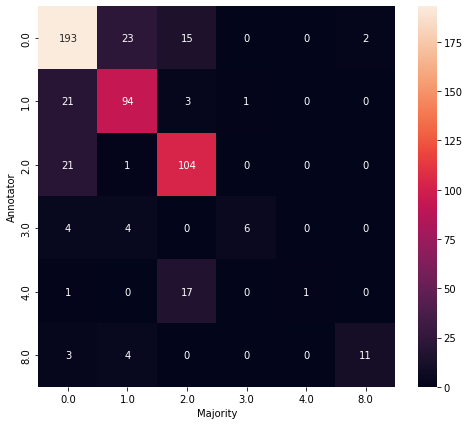

Cohen's kappa for  --> Causal Slippery Slope 	 nan
Accuracy for  --> Causal Slippery Slope 	 1.0 

Cohen's kappa for  --> Danger Appeal 	 0.0
Accuracy for  --> Danger Appeal 	 0.96 

Cohen's kappa for  --> Default Inference 	 0.6
Accuracy for  --> Default Inference 	 0.8 

Cohen's kappa for  --> Fear Appeal 	 0.35
Accuracy for  --> Fear Appeal 	 0.98 

Cohen's kappa for  --> Need For Help 	 0.51
Accuracy for  --> Need For Help 	 0.98 

Cohen's kappa for  --> Negative Consequences 	 0.66
Accuracy for  --> Negative Consequences 	 0.88 

Cohen's kappa for  --> Positive Consequences 	 0.68
Accuracy for  --> Positive Consequences 	 0.89 

Cohen's kappa for  --> Waste 	 nan
Accuracy for  --> Waste 	 1.0 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [ ]:
a0 = a00.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = all_agg.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa  \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)} \n")

plt.figure(figsize=(8,7))
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(a0, a1), annot=True, fmt='g', ax=ax)
ax.xaxis.set_ticklabels(list(str(x) for x in set(a0))); ax.yaxis.set_ticklabels(list(str(x) for x in set(a0)))
plt.ylabel("Annotator")
plt.xlabel("Majority")
plt.show()

for scheme in scheme_cols:  
  a0 = a00.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  a1 = all_agg.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  cohen_k = cohen_kappa_score(a0, a1)
  print(f"Cohen's kappa for  --> {scheme} \t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} \t {round(accuracy_score(a0, a1), 2)} \n")  

In [ ]:
a11.scheme_label.unique()

array([1., 0., 2., 4., 7., 3., 8.])

Cohen's kappa  	 0.54
Accuracy 0.69 




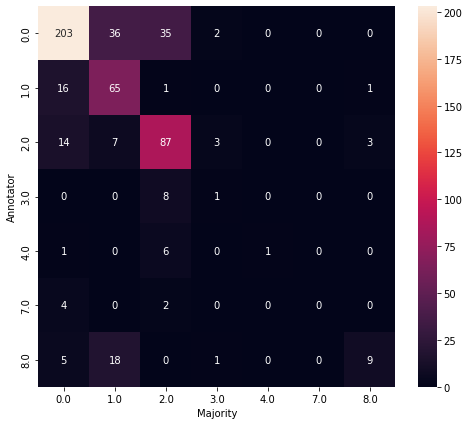

Cohen's kappa for  --> Causal Slippery Slope 	 nan
Accuracy for  --> Causal Slippery Slope 	 1.0 

Cohen's kappa for  --> Danger Appeal 	 0.0
Accuracy for  --> Danger Appeal 	 0.98 

Cohen's kappa for  --> Default Inference 	 0.6
Accuracy for  --> Default Inference 	 0.8 

Cohen's kappa for  --> Fear Appeal 	 -0.01
Accuracy for  --> Fear Appeal 	 0.98 

Cohen's kappa for  --> Need For Help 	 0.27
Accuracy for  --> Need For Help 	 0.94 

Cohen's kappa for  --> Negative Consequences 	 0.53
Accuracy for  --> Negative Consequences 	 0.84 

Cohen's kappa for  --> Positive Consequences 	 0.54
Accuracy for  --> Positive Consequences 	 0.85 

Cohen's kappa for  --> Waste 	 0.0
Accuracy for  --> Waste 	 0.99 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [ ]:
a0 = a11.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = all_agg.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa  \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)} \n\n")

plt.figure(figsize=(8,7))
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(a0, a1), annot=True, fmt='g', ax=ax)
ax.xaxis.set_ticklabels(list(str(x) for x in set(a0))); ax.yaxis.set_ticklabels(list(str(x) for x in set(a0)))
plt.ylabel("Annotator")
plt.xlabel("Majority")
plt.show()

for scheme in scheme_cols:  
  a0 = a11.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  a1 = all_agg.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  cohen_k = cohen_kappa_score(a0, a1)
  print(f"Cohen's kappa for  --> {scheme} \t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} \t {round(accuracy_score(a0, a1), 2)} \n")  

In [ ]:
a22.scheme_label.unique()

array([1., 0., 3., 2., 4., 8., 6., 7.])

Cohen's kappa  	 0.46
Accuracy 0.61 




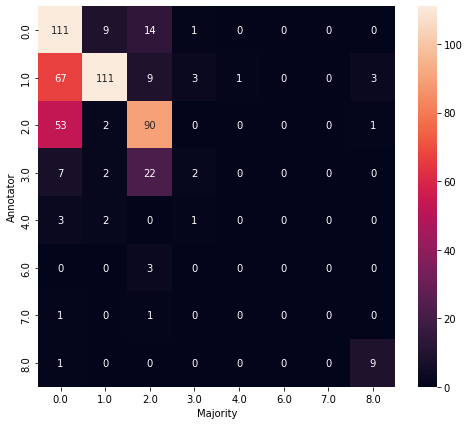

Cohen's kappa for  --> Causal Slippery Slope 	 0.0
Accuracy for  --> Causal Slippery Slope 	 0.99 

Cohen's kappa for  --> Danger Appeal 	 0.0
Accuracy for  --> Danger Appeal 	 0.99 

Cohen's kappa for  --> Default Inference 	 0.45
Accuracy for  --> Default Inference 	 0.75 

Cohen's kappa for  --> Fear Appeal 	 0.05
Accuracy for  --> Fear Appeal 	 0.94 

Cohen's kappa for  --> Need For Help 	 0.95
Accuracy for  --> Need For Help 	 1.0 

Cohen's kappa for  --> Negative Consequences 	 0.57
Accuracy for  --> Negative Consequences 	 0.84 

Cohen's kappa for  --> Positive Consequences 	 0.56
Accuracy for  --> Positive Consequences 	 0.81 

Cohen's kappa for  --> Waste 	 0.0
Accuracy for  --> Waste 	 1.0 



In [ ]:
a0 = a22.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = all_agg.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa  \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)} \n\n")

plt.figure(figsize=(8,7))
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(a0, a1), annot=True, fmt='g', ax=ax)
ax.xaxis.set_ticklabels(list(str(x) for x in set(a0))); ax.yaxis.set_ticklabels(list(str(x) for x in set(a0)))
plt.ylabel("Annotator")
plt.xlabel("Majority")
plt.show()

for scheme in scheme_cols:  
  a0 = a22.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  a1 = all_agg.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  cohen_k = cohen_kappa_score(a0, a1)
  print(f"Cohen's kappa for  --> {scheme} \t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} \t {round(accuracy_score(a0, a1), 2)} \n")  

In [ ]:
a33.scheme_label.unique()

array([2., 0., 1., 7., 8., 3., 4.])

Cohen's kappa  	 0.65
Accuracy 0.77



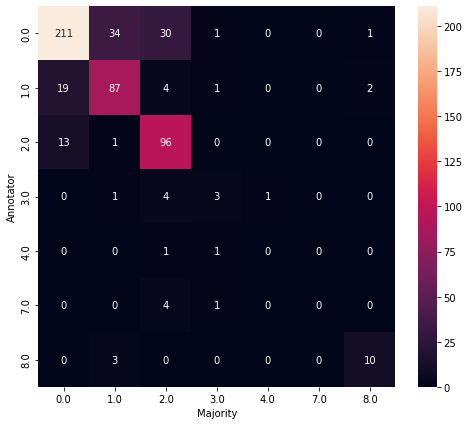

Cohen's kappa for  --> Causal Slippery Slope 	 nan
Accuracy for  --> Causal Slippery Slope 	 1.0 

Cohen's kappa for  --> Danger Appeal 	 0.0
Accuracy for  --> Danger Appeal 	 1.0 

Cohen's kappa for  --> Default Inference 	 0.62
Accuracy for  --> Default Inference 	 0.81 

Cohen's kappa for  --> Fear Appeal 	 0.5
Accuracy for  --> Fear Appeal 	 0.99 

Cohen's kappa for  --> Need For Help 	 0.81
Accuracy for  --> Need For Help 	 0.99 

Cohen's kappa for  --> Negative Consequences 	 0.73
Accuracy for  --> Negative Consequences 	 0.91 

Cohen's kappa for  --> Positive Consequences 	 0.67
Accuracy for  --> Positive Consequences 	 0.88 

Cohen's kappa for  --> Waste 	 0.0
Accuracy for  --> Waste 	 0.99 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [ ]:
a0 = a33.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = all_agg.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa  \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)}\n")

plt.figure(figsize=(8,7))
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(a0, a1), annot=True, fmt='g', ax=ax)
ax.xaxis.set_ticklabels(list(str(x) for x in set(a0))); ax.yaxis.set_ticklabels(list(str(x) for x in set(a0)))
plt.ylabel("Annotator")
plt.xlabel("Majority")
plt.show()

for scheme in scheme_cols:  
  a0 = a33.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  a1 = all_agg.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  cohen_k = cohen_kappa_score(a0, a1)
  print(f"Cohen's kappa for  --> {scheme} \t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} \t {round(accuracy_score(a0, a1), 2)} \n")  

In [ ]:
a44.scheme_label.unique()

array([1., 2., 0., 3., 8., 7., 4.])

Cohen's kappa  	 0.63
Accuracy 0.75



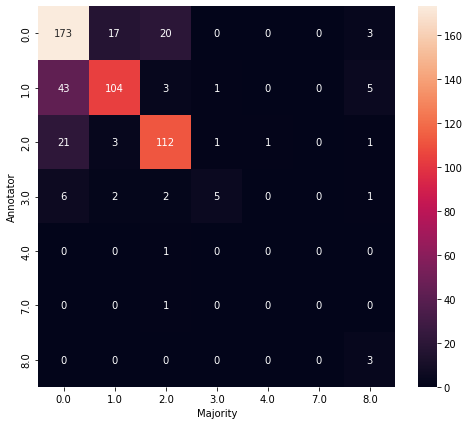

Cohen's kappa for  --> Causal Slippery Slope 	 nan
Accuracy for  --> Causal Slippery Slope 	 1.0 

Cohen's kappa for  --> Danger Appeal 	 0.0
Accuracy for  --> Danger Appeal 	 1.0 

Cohen's kappa for  --> Default Inference 	 0.62
Accuracy for  --> Default Inference 	 0.81 

Cohen's kappa for  --> Fear Appeal 	 0.2
Accuracy for  --> Fear Appeal 	 0.97 

Cohen's kappa for  --> Need For Help 	 0.5
Accuracy for  --> Need For Help 	 0.99 

Cohen's kappa for  --> Negative Consequences 	 0.75
Accuracy for  --> Negative Consequences 	 0.91 

Cohen's kappa for  --> Positive Consequences 	 0.65
Accuracy for  --> Positive Consequences 	 0.86 

Cohen's kappa for  --> Waste 	 0.0
Accuracy for  --> Waste 	 1.0 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [ ]:
a0 = a44.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = all_agg.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
cohen_k = cohen_kappa_score(a0, a1)
print(f"Cohen's kappa  \t {round(cohen_k, 2)}")
print(f"Accuracy {round(accuracy_score(a0, a1), 2)}\n")

plt.figure(figsize=(8,7))
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(a0, a1), annot=True, fmt='g', ax=ax)
ax.xaxis.set_ticklabels(list(str(x) for x in set(a0))); ax.yaxis.set_ticklabels(list(str(x) for x in set(a0)))
plt.ylabel("Annotator")
plt.xlabel("Majority")
plt.show()


for scheme in scheme_cols:  
  a0 = a44.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  a1 = all_agg.sort_values(by = ['premise', 'conclusion'])[scheme].tolist()
  cohen_k = cohen_kappa_score(a0, a1)
  print(f"Cohen's kappa for  --> {scheme} \t {round(cohen_k, 2)}")
  print(f"Accuracy for  --> {scheme} \t {round(accuracy_score(a0, a1), 2)} \n")  

#Plots

In [ ]:
scheme_cols

['Causal Slippery Slope',
 'Danger Appeal',
 'Default Inference',
 'Fear Appeal',
 'Need For Help',
 'Negative Consequences',
 'Positive Consequences',
 'Waste']

In [ ]:
name = ['All Schemes'] * 5 + [scheme_cols[0]] * 5 + [scheme_cols[1]] * 5 + [scheme_cols[2]] * 5 \
+ [scheme_cols[3]] * 5 + [scheme_cols[4]] * 5 + [scheme_cols[5]] * 5 + [scheme_cols[6]] * 5 + [scheme_cols[7]] * 5
name = name * 2

metric = ["Cohen's kappa"] * 45 + ["Accuracy"] * 45

# kappa and acc scores
values = [0.7, 0.5, 0.5, 0.7, 0.6, 
          np.nan, np.nan, 0, np.nan, np.nan, 
          0, 0, 0, 0, 0, 
          0.6, 0.6, 0.5, 0.6, 0.6, 
          0.4, 0, 0.1, 0.5, 0.2, 
          0.5, 0.3, 1, 0.8, 0.5, 
          0.7, 0.5, 0.6, 0.7, 0.8, 
          0.7, 0.5, 0.6, 0.7, 0.7, 
          np.nan, 0, 0, 0, 0, 
          0.8, 0.7, 0.6, 0.8, 0.8, 
          1, 1, 1, 1, 1, 
          1, 1, 1, 1, 1, 
          0.8, 0.8, 0.8, 0.8, 0.8, 
          1, 1, 1, 1, 1, 
          1, 1, 1, 1, 1, 
          0.9, 0.8, 0.8, 0.9, 0.9, 
          0.9, 0.9, 0.8, 0.9, 0.9, 
          1, 1, 1, 1, 1]

In [ ]:
plot_df = pd.DataFrame({"scheme":name, "metric":metric, "score":values})
plot_df.fillna(0, inplace=True)
plot_df.shape

(90, 3)

In [ ]:
plot_df.head(7)

,scheme,metric,score
0,All Schemes,Cohen's kappa,0.7
1,All Schemes,Cohen's kappa,0.5
2,All Schemes,Cohen's kappa,0.5
3,All Schemes,Cohen's kappa,0.7
4,All Schemes,Cohen's kappa,0.6
5,Causal Slippery Slope,Cohen's kappa,0.0
6,Causal Slippery Slope,Cohen's kappa,0.0


In [ ]:
plot_df_k = plot_df[plot_df.metric == "Cohen's kappa"]
plot_df_a = plot_df[plot_df.metric == "Accuracy"]

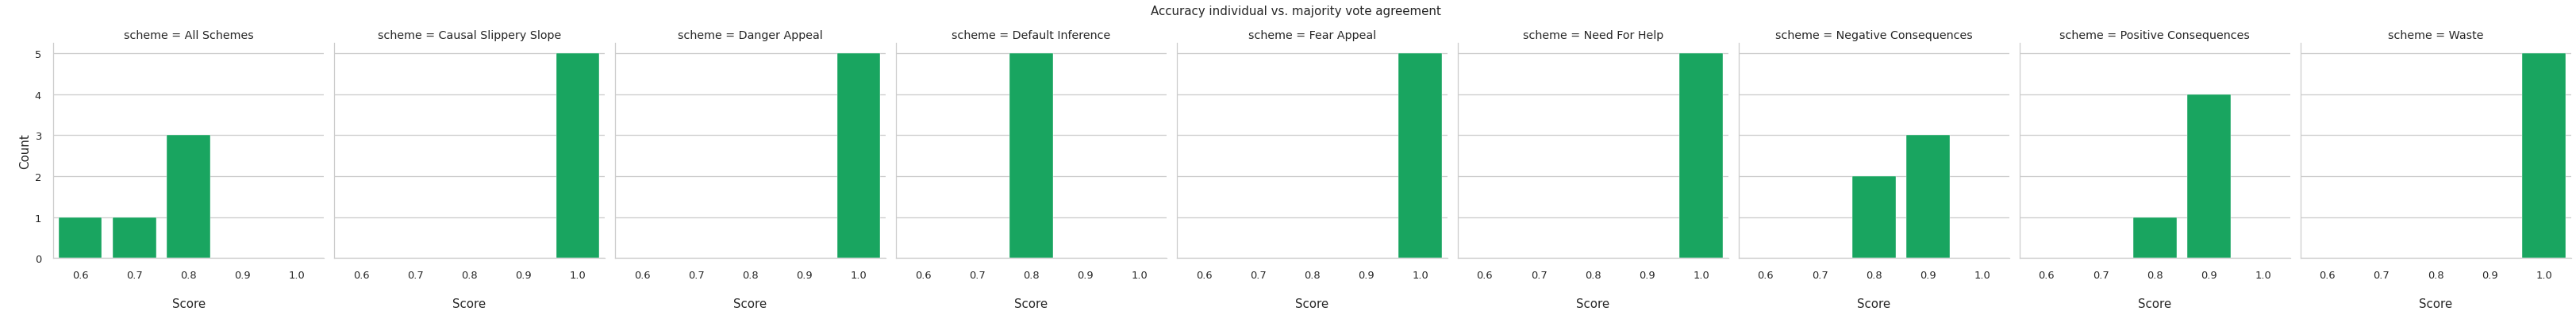

In [ ]:
fig_a = sns.catplot(data = plot_df_a, x = 'score', col = "scheme", color = "#02BC60", 
            facet_kws=dict(margin_titles=True), kind='count')

plt.suptitle('Accuracy individual vs. majority vote agreement\n\n', y=1.05, fontsize=15)
fig_a.set_ylabels("\nCount", fontsize=15)
fig_a.set_xlabels("\nScore", fontsize=15)
plt.show()

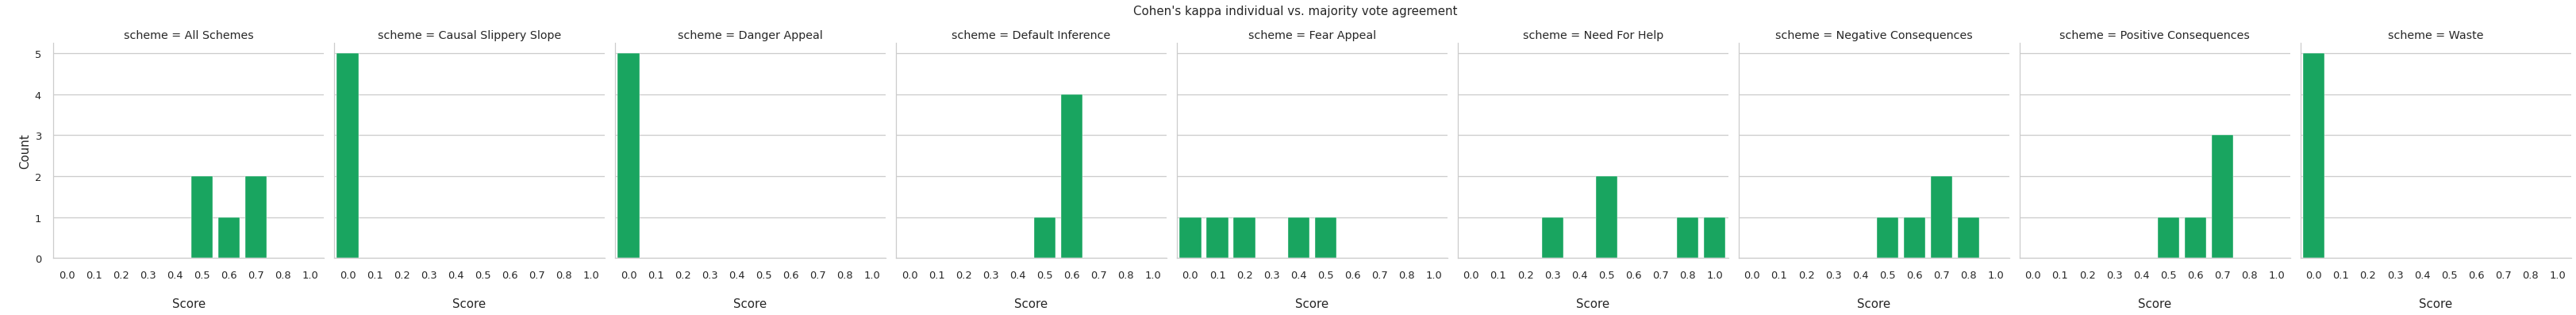

In [ ]:
fig_k = sns.catplot(data = plot_df_k, x = 'score', col = "scheme", color = "#02BC60", 
            facet_kws=dict(margin_titles=True), kind='count')
plt.suptitle("Cohen's kappa individual vs. majority vote agreement\n\n", y=1.05, fontsize=15)
fig_k.set_ylabels("\nCount", fontsize=15)
fig_k.set_xlabels("\nScore", fontsize=15)
plt.show()

#Error analysis plot

In [ ]:
scheme_cols

['Causal Slippery Slope',
 'Danger Appeal',
 'Default Inference',
 'Fear Appeal',
 'Need For Help',
 'Negative Consequences',
 'Positive Consequences',
 'Waste']

In [ ]:
all_agg = load_data("/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/majority_all_agg_actual_kappa_maps.xlsx")
print(all_agg.shape)
all_agg.tail(2)

In [ ]:
all_agg[scheme_cols].sum(numeric_only=True)

Causal Slippery Slope      0
Danger Appeal              0
Default Inference        221
Fear Appeal                3
Need For Help              9
Negative Consequences    115
Positive Consequences    122
Waste                      0
dtype: int64

In [ ]:
maps = load_data('/content/drive/MyDrive/Colab Notebooks/debates/Argument_schemes/schemes_annotation/all_annot_actual_kappa_maps.xlsx')
print(maps.shape)
maps.sort_values(by = ['conclusion', 'premise', 'annotator_id'], inplace = True)
maps.reset_index(inplace=True, drop=True)

(2645, 18)


In [ ]:
maps_ag = maps.groupby(['conclusion', 'premise', 'annotator_id'], as_index=False).agg(lambda x:x.value_counts().index[0])
maps_ag.shape

(2645, 18)

In [ ]:
maps.scheme_name.value_counts()

Default Inference        1134
Positive Consequences     665
Negative Consequences     635
Fear Appeal                81
Need For Help              77
Danger Appeal              36
Waste                      14
Causal Slippery Slope       3
Name: scheme_name, dtype: int64

In [ ]:
df_compare= pd.DataFrame(columns = maps.columns)

low = 0
up = 5

for i in range(529):
  if maps.iloc[low:up]["scheme_label"].nunique() >= 2:
    df_compare= pd.concat([df_compare, maps.iloc[low:up]], axis = 0)
  low += 5
  up += 5

df_compare.shape  

(2155, 18)

In [ ]:
2155/5

431.0

In [ ]:
a00 = df_compare[df_compare.annotator_id == 0]
a00.sort_values(by = ['conclusion', 'premise'], inplace = True)
a00.reset_index(inplace=True, drop=True)

a11 = df_compare[df_compare.annotator_id == 1]
a11.sort_values(by = ['conclusion', 'premise'], inplace = True)
a11.reset_index(inplace=True, drop=True)

a22 = df_compare[df_compare.annotator_id == 2]
a22.sort_values(by = ['conclusion', 'premise'], inplace = True)
a22.reset_index(inplace=True, drop=True)

a33 = df_compare[df_compare.annotator_id == 3]
a33.sort_values(by = ['conclusion', 'premise'], inplace = True)
a33.reset_index(inplace=True, drop=True)

a44 = df_compare[df_compare.annotator_id == 4]
a44.sort_values(by = ['conclusion', 'premise'], inplace = True)
a44.reset_index(inplace=True, drop=True)

a00.shape, a11.shape, a22.shape, a33.shape, a44.shape, 

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


((431, 18), (431, 18), (431, 18), (431, 18), (431, 18))

In [ ]:
rater_df2 = pd.concat([a00[['conclusion', 'premise', 'annotator_id', 'scheme_label', 'scheme_name']], 
                      a11[['conclusion', 'premise', 'annotator_id', 'scheme_label', 'scheme_name']], 
                      a22[['conclusion', 'premise', 'annotator_id', 'scheme_label', 'scheme_name']],
                      a33[['conclusion', 'premise', 'annotator_id', 'scheme_label', 'scheme_name']],
                      a44[['conclusion', 'premise', 'annotator_id', 'scheme_label', 'scheme_name']]], axis = 0)
rater_df2.reset_index(inplace=True)

In [ ]:
rater_df2['index'].nunique()

431

In [ ]:
rater_df2.columns  = ['item', 'conclusion', 'premise', 'rater', 'rating', 'rating_name']
rater_df2.head(2)

,item,conclusion,premise,rater,rating,rating_name
0,0,absolutely yes . And not only will CRUZ support it,CRUZ has authored Kate 's law in the United States Senate and filed that legislation,0,0,Default Inference
1,1,"jesteśmy w stałym zagrożeniu, że Polska może stracić swoją tożsamość","Po co nam Polska, przecież są Niemcy",0,2,Negative Consequences


In [ ]:
rater_df2.item.nunique()

431

In [ ]:
rater_df2.iloc[::431]

,item,conclusion,premise,rater,rating,rating_name
0,0,absolutely yes . And not only will CRUZ support it,CRUZ has authored Kate 's law in the United States Senate and filed that legislation,0,0,Default Inference
431,0,absolutely yes . And not only will CRUZ support it,CRUZ has authored Kate 's law in the United States Senate and filed that legislation,1,0,Default Inference
862,0,absolutely yes . And not only will CRUZ support it,CRUZ has authored Kate 's law in the United States Senate and filed that legislation,2,0,Default Inference
1293,0,absolutely yes . And not only will CRUZ support it,CRUZ has authored Kate 's law in the United States Senate and filed that legislation,3,1,Positive Consequences
1724,0,absolutely yes . And not only will CRUZ support it,CRUZ has authored Kate 's law in the United States Senate and filed that legislation,4,1,Positive Consequences


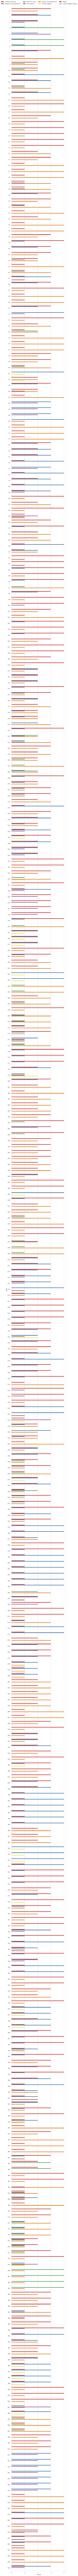

In [ ]:
plt.figure(figsize = (10, 480))
sns.set_theme(style="whitegrid")
plt.style.use("seaborn-talk")

ax = sns.countplot(y="item", hue="rating_name", data=rater_df2, dodge=True, palette='Set1')
ax.set_title(" \n\n", fontsize = 15)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.003), ncol=4)
plt.xticks(np.arange(0, 5, 1))
plt.show()

#Alternative IAA scores

##From R lang irrCAC package - multi-category multi-rater scores 
## and PYCM 

In [ ]:
''' normal and in (including only 3 best annotators)

Gwet's AC1	              coeff: 0.49 (0.56)      pa: 0.541 (0.606)        pe: 0.099 (0.113)

Fleiss' Kappa		          coeff: 0.34 (0.416)      pa: 0.541	        pe:0.307 (0.324)

Krippendorff's Alpha	  	coeff: 0.34       pa: 0.541         pe: 0.307

Brennan-Prediger	 	    	coeff: 0.48 (0.540)       pa: 0.541         pe: 0.125 (0.145)

Percent agreement			    coeff: 0.54  (0.61)  

'''


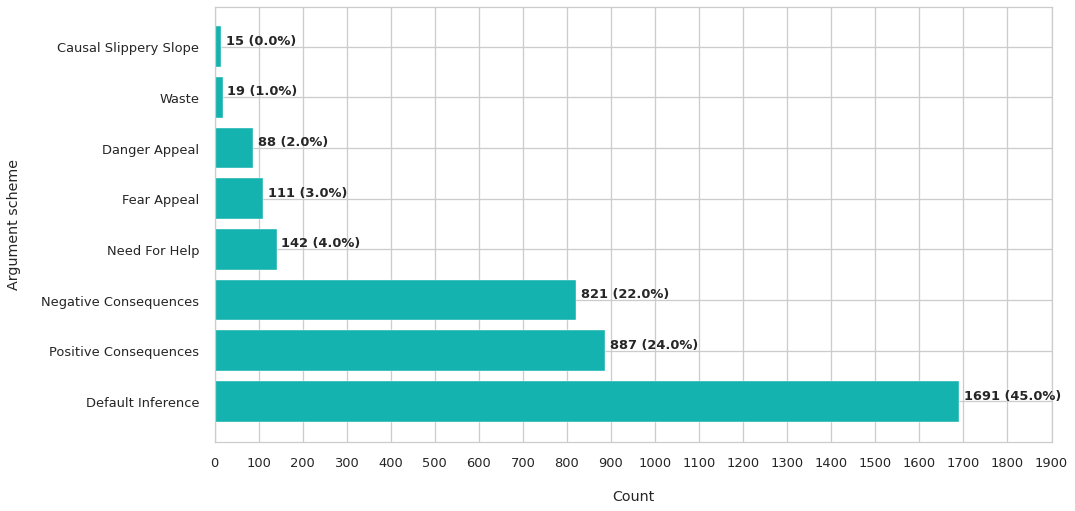

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

n = maps["scheme_name"].value_counts().index.tolist()
s = maps["scheme_name"].value_counts().values
bars = ax.barh(n, s, color = "#15B3AF")

plt.xticks(np.arange(0, 1901, 100))

y = s

yy =(maps["scheme_name"].value_counts(normalize=True).round(2)*100).values
for i, v in enumerate(y):
    ax.text(v + 10, i + .05, str(v) + f" ({str(yy[i])}%)", fontweight='bold', fontsize=13)

plt.xlabel("\nCount")
plt.ylabel("Argument scheme\n")
plt.show()

##**Binary labels** 

In [ ]:
def pos_spec_agree(b, c, d):
  try:
    score = (2*d) / ( (2*d) + b + c)
    print(f"Positive specific agreement: {round(score, 3)} ")
  except:
    print("Probably ZeroDivisionError, cannot calculate the score")
  

def neg_spec_agree(a, b, c):
  try:
    score = (2*a) / ( (2*a) + b + c)
    print(f"Negative specific agreement: {round(score, 3)} ")
  except:
    print("Probably ZeroDivisionError, cannot calculate the score")  
  

annotator 0 compare

In [ ]:
for scheme in scheme_cols:  
  a1 = a00.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a11.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  ['0', '~other~'] 

Overall ACC: 1.0
Kappa: None
Overall RACC: 1.0
SOA1(Landis & Koch): None
SOA2(Fleiss): None
SOA3(Altman): None
SOA4(Cicchetti): None
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: None
TPR Macro: None
FPR Macro: None
FNR Macro: None
PPV Macro: None
ACC Macro: 1.0
F1 Macro: None
TNR Micro: 1.0
FPR Micro: 0.0
TPR Micro: 1.0
FNR Micro: 0.0
PPV Micro: 1.0
F1 Micro: 1.0
Scott PI: None
Gwet AC1: 1.0
Bennett S: 1.0
Kappa Standard Error: None
Kappa 95% CI: ('None', 'None')
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (1.0, 1.0)
Standard Error: 0.0
Response Entropy: -0.0
Reference Entropy: -0.0
Cross Entropy: -0.0
Joint Entropy: -0.0
Conditional Entropy: -0.0
KL Divergence: None
Lambda B: None
Lambda A: None
Kappa Unbiased: None
Overall RACCU: 1.0
Kappa No Prevalence: 1.0
Mutual Information: 0.0
Overall J: None
Hamming Loss: 0.0
Zero-one Loss: 0
NIR: 1.0
P-Value: 1.0
Overall CEN: None
Overall MCEN: None
Overa

In [ ]:
for scheme in scheme_cols:  
  a1 = a00.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a22.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  [0, 1] 

Overall ACC: 0.994328922495274
Kappa: 0.0
Overall RACC: 0.994328922495274
SOA1(Landis & Koch): Slight
SOA2(Fleiss): Poor
SOA3(Altman): Poor
SOA4(Cicchetti): Poor
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: None
TPR Macro: None
FPR Macro: None
FNR Macro: None
PPV Macro: 0.5
ACC Macro: 0.994328922495274
F1 Macro: 0.4985781990521327
TNR Micro: 0.994328922495274
FPR Micro: 0.005671077504725952
TPR Micro: 0.994328922495274
FNR Micro: 0.005671077504725952
PPV Micro: 0.994328922495274
F1 Micro: 0.994328922495274
Scott PI: -0.0028436018957190773
Gwet AC1: 0.9942966701825819
Bennett S: 0.9886578449905481
Kappa Standard Error: 0.5757108424939452
Kappa 95% CI: (-1.1283932512881325, 1.1283932512881325)
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (0.9879297169114093, 1.0007281280791387)
Standard Error: 0.0032649008080942385
Response Entropy: 0.05047688778526495
Reference Entropy: -0.0
Cross Entropy: 0.00820492282172347

In [ ]:
for scheme in scheme_cols:  
  a1 = a00.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a33.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  ['0', '~other~'] 

Overall ACC: 1.0
Kappa: None
Overall RACC: 1.0
SOA1(Landis & Koch): None
SOA2(Fleiss): None
SOA3(Altman): None
SOA4(Cicchetti): None
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: None
TPR Macro: None
FPR Macro: None
FNR Macro: None
PPV Macro: None
ACC Macro: 1.0
F1 Macro: None
TNR Micro: 1.0
FPR Micro: 0.0
TPR Micro: 1.0
FNR Micro: 0.0
PPV Micro: 1.0
F1 Micro: 1.0
Scott PI: None
Gwet AC1: 1.0
Bennett S: 1.0
Kappa Standard Error: None
Kappa 95% CI: ('None', 'None')
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (1.0, 1.0)
Standard Error: 0.0
Response Entropy: -0.0
Reference Entropy: -0.0
Cross Entropy: -0.0
Joint Entropy: -0.0
Conditional Entropy: -0.0
KL Divergence: None
Lambda B: None
Lambda A: None
Kappa Unbiased: None
Overall RACCU: 1.0
Kappa No Prevalence: 1.0
Mutual Information: 0.0
Overall J: None
Hamming Loss: 0.0
Zero-one Loss: 0
NIR: 1.0
P-Value: 1.0
Overall CEN: None
Overall MCEN: None
Overa

In [ ]:
for scheme in scheme_cols:  
  a1 = a00.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a44.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  ['0', '~other~'] 

Overall ACC: 1.0
Kappa: None
Overall RACC: 1.0
SOA1(Landis & Koch): None
SOA2(Fleiss): None
SOA3(Altman): None
SOA4(Cicchetti): None
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: None
TPR Macro: None
FPR Macro: None
FNR Macro: None
PPV Macro: None
ACC Macro: 1.0
F1 Macro: None
TNR Micro: 1.0
FPR Micro: 0.0
TPR Micro: 1.0
FNR Micro: 0.0
PPV Micro: 1.0
F1 Micro: 1.0
Scott PI: None
Gwet AC1: 1.0
Bennett S: 1.0
Kappa Standard Error: None
Kappa 95% CI: ('None', 'None')
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (1.0, 1.0)
Standard Error: 0.0
Response Entropy: -0.0
Reference Entropy: -0.0
Cross Entropy: -0.0
Joint Entropy: -0.0
Conditional Entropy: -0.0
KL Divergence: None
Lambda B: None
Lambda A: None
Kappa Unbiased: None
Overall RACCU: 1.0
Kappa No Prevalence: 1.0
Mutual Information: 0.0
Overall J: None
Hamming Loss: 0.0
Zero-one Loss: 0
NIR: 1.0
P-Value: 1.0
Overall CEN: None
Overall MCEN: None
Overa

annotator 1 compare

In [ ]:
for scheme in scheme_cols:  
  a1 = a11.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a22.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  [0, 1] 

Overall ACC: 0.994328922495274
Kappa: 0.0
Overall RACC: 0.994328922495274
SOA1(Landis & Koch): Slight
SOA2(Fleiss): Poor
SOA3(Altman): Poor
SOA4(Cicchetti): Poor
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: None
TPR Macro: None
FPR Macro: None
FNR Macro: None
PPV Macro: 0.5
ACC Macro: 0.994328922495274
F1 Macro: 0.4985781990521327
TNR Micro: 0.994328922495274
FPR Micro: 0.005671077504725952
TPR Micro: 0.994328922495274
FNR Micro: 0.005671077504725952
PPV Micro: 0.994328922495274
F1 Micro: 0.994328922495274
Scott PI: -0.0028436018957190773
Gwet AC1: 0.9942966701825819
Bennett S: 0.9886578449905481
Kappa Standard Error: 0.5757108424939452
Kappa 95% CI: (-1.1283932512881325, 1.1283932512881325)
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (0.9879297169114093, 1.0007281280791387)
Standard Error: 0.0032649008080942385
Response Entropy: 0.05047688778526495
Reference Entropy: -0.0
Cross Entropy: 0.00820492282172347

In [ ]:
for scheme in scheme_cols:  
  a1 = a11.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a33.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  ['0', '~other~'] 

Overall ACC: 1.0
Kappa: None
Overall RACC: 1.0
SOA1(Landis & Koch): None
SOA2(Fleiss): None
SOA3(Altman): None
SOA4(Cicchetti): None
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: None
TPR Macro: None
FPR Macro: None
FNR Macro: None
PPV Macro: None
ACC Macro: 1.0
F1 Macro: None
TNR Micro: 1.0
FPR Micro: 0.0
TPR Micro: 1.0
FNR Micro: 0.0
PPV Micro: 1.0
F1 Micro: 1.0
Scott PI: None
Gwet AC1: 1.0
Bennett S: 1.0
Kappa Standard Error: None
Kappa 95% CI: ('None', 'None')
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (1.0, 1.0)
Standard Error: 0.0
Response Entropy: -0.0
Reference Entropy: -0.0
Cross Entropy: -0.0
Joint Entropy: -0.0
Conditional Entropy: -0.0
KL Divergence: None
Lambda B: None
Lambda A: None
Kappa Unbiased: None
Overall RACCU: 1.0
Kappa No Prevalence: 1.0
Mutual Information: 0.0
Overall J: None
Hamming Loss: 0.0
Zero-one Loss: 0
NIR: 1.0
P-Value: 1.0
Overall CEN: None
Overall MCEN: None
Overa

In [ ]:
for scheme in scheme_cols:  
  a1 = a11.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a44.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  ['0', '~other~'] 

Overall ACC: 1.0
Kappa: None
Overall RACC: 1.0
SOA1(Landis & Koch): None
SOA2(Fleiss): None
SOA3(Altman): None
SOA4(Cicchetti): None
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: None
TPR Macro: None
FPR Macro: None
FNR Macro: None
PPV Macro: None
ACC Macro: 1.0
F1 Macro: None
TNR Micro: 1.0
FPR Micro: 0.0
TPR Micro: 1.0
FNR Micro: 0.0
PPV Micro: 1.0
F1 Micro: 1.0
Scott PI: None
Gwet AC1: 1.0
Bennett S: 1.0
Kappa Standard Error: None
Kappa 95% CI: ('None', 'None')
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (1.0, 1.0)
Standard Error: 0.0
Response Entropy: -0.0
Reference Entropy: -0.0
Cross Entropy: -0.0
Joint Entropy: -0.0
Conditional Entropy: -0.0
KL Divergence: None
Lambda B: None
Lambda A: None
Kappa Unbiased: None
Overall RACCU: 1.0
Kappa No Prevalence: 1.0
Mutual Information: 0.0
Overall J: None
Hamming Loss: 0.0
Zero-one Loss: 0
NIR: 1.0
P-Value: 1.0
Overall CEN: None
Overall MCEN: None
Overa

annotator 2 compare

In [ ]:
for scheme in scheme_cols:  
  a1 = a22.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a33.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  [0, 1] 

Overall ACC: 0.994328922495274
Kappa: 0.0
Overall RACC: 0.994328922495274
SOA1(Landis & Koch): Slight
SOA2(Fleiss): Poor
SOA3(Altman): Poor
SOA4(Cicchetti): Poor
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: 0.5
TPR Macro: 0.5
FPR Macro: 0.5
FNR Macro: 0.5
PPV Macro: None
ACC Macro: 0.994328922495274
F1 Macro: 0.4985781990521327
TNR Micro: 0.994328922495274
FPR Micro: 0.005671077504725952
TPR Micro: 0.994328922495274
FNR Micro: 0.005671077504725952
PPV Micro: 0.994328922495274
F1 Micro: 0.994328922495274
Scott PI: -0.0028436018957190773
Gwet AC1: 0.9942966701825819
Bennett S: 0.9886578449905481
Kappa Standard Error: 0.5757108424939452
Kappa 95% CI: (-1.1283932512881325, 1.1283932512881325)
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (0.9879297169114093, 1.0007281280791387)
Standard Error: 0.0032649008080942385
Response Entropy: -0.0
Reference Entropy: 0.05047688778526495
Cross Entropy: -0.0
Joint Entropy: 0.

In [ ]:
for scheme in scheme_cols:  
  a1 = a22.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a44.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  [0, 1] 

Overall ACC: 0.994328922495274
Kappa: 0.0
Overall RACC: 0.994328922495274
SOA1(Landis & Koch): Slight
SOA2(Fleiss): Poor
SOA3(Altman): Poor
SOA4(Cicchetti): Poor
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: 0.5
TPR Macro: 0.5
FPR Macro: 0.5
FNR Macro: 0.5
PPV Macro: None
ACC Macro: 0.994328922495274
F1 Macro: 0.4985781990521327
TNR Micro: 0.994328922495274
FPR Micro: 0.005671077504725952
TPR Micro: 0.994328922495274
FNR Micro: 0.005671077504725952
PPV Micro: 0.994328922495274
F1 Micro: 0.994328922495274
Scott PI: -0.0028436018957190773
Gwet AC1: 0.9942966701825819
Bennett S: 0.9886578449905481
Kappa Standard Error: 0.5757108424939452
Kappa 95% CI: (-1.1283932512881325, 1.1283932512881325)
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (0.9879297169114093, 1.0007281280791387)
Standard Error: 0.0032649008080942385
Response Entropy: -0.0
Reference Entropy: 0.05047688778526495
Cross Entropy: -0.0
Joint Entropy: 0.

annotator 3 compare

In [ ]:
for scheme in scheme_cols:  
  a1 = a33.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 
  a2 = a44.sort_values(by = ['premise', 'conclusion'])[scheme].tolist() # 

  cm = ConfusionMatrix(a1, a2)
  
  print(f"{scheme}")
  print("Classes: ", cm.classes, "\n")
  for k, v in cm.overall_stat.items():
    print(f"{k}: {v}")
  print()
  cm.print_matrix()
  a, b = list(list(cm.table.values())[0].values())
  c, d = list(list(cm.table.values())[1].values())

  pos_spec_agree(b, c, d)
  neg_spec_agree(a, b, c)
  print("\n\n")

Causal Slippery Slope
Classes:  ['0', '~other~'] 

Overall ACC: 1.0
Kappa: None
Overall RACC: 1.0
SOA1(Landis & Koch): None
SOA2(Fleiss): None
SOA3(Altman): None
SOA4(Cicchetti): None
SOA5(Cramer): None
SOA6(Matthews): None
TNR Macro: None
TPR Macro: None
FPR Macro: None
FNR Macro: None
PPV Macro: None
ACC Macro: 1.0
F1 Macro: None
TNR Micro: 1.0
FPR Micro: 0.0
TPR Micro: 1.0
FNR Micro: 0.0
PPV Micro: 1.0
F1 Micro: 1.0
Scott PI: None
Gwet AC1: 1.0
Bennett S: 1.0
Kappa Standard Error: None
Kappa 95% CI: ('None', 'None')
Chi-Squared: None
Phi-Squared: None
Cramer V: None
Chi-Squared DF: 1
95% CI: (1.0, 1.0)
Standard Error: 0.0
Response Entropy: -0.0
Reference Entropy: -0.0
Cross Entropy: -0.0
Joint Entropy: -0.0
Conditional Entropy: -0.0
KL Divergence: None
Lambda B: None
Lambda A: None
Kappa Unbiased: None
Overall RACCU: 1.0
Kappa No Prevalence: 1.0
Mutual Information: 0.0
Overall J: None
Hamming Loss: 0.0
Zero-one Loss: 0
NIR: 1.0
P-Value: 1.0
Overall CEN: None
Overall MCEN: None
Overa

##**Multi-category**

annotator 0 compare

In [ ]:
a0 = a00.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a11.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()


cm = ConfusionMatrix(a1, a0)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a1, a0)
score_cba = balanced_accuracy_score(a1, a0)

print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict   0         1         2         3         4         7         8         
Actual
0         171       45        50        7         1         0         2         

1         28        52        1         1         0         0         1         

2         22        6         58        3         17        0         8         

3         0         0         8         1         0         0         0         

4         1         0         6         0         1         0         0         

7         3         0         3         0         0         0         0         

8         8         16        0         2         0         0         7         


Classes:  [0, 1, 2, 3, 4, 7, 8] 

Overall ACC: 0.5482041587901701
Overall RACCU: 0.3228440435818911
Overall RACC: 0.3195421685885914
Kappa: 0.33604138220775126
Gwet AC1: 0.49072807223658155
Bennett S: 0.47290485192186515
Kappa Standard Error: 0.03179898256705593
Kappa Unbiased: 0.33280385865664713
Scott PI: 0.33280385865664713
Kappa No

In [ ]:
a0 = a00.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a22.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()

cm = ConfusionMatrix(a1, a0)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a1, a0)
score_cba = balanced_accuracy_score(a1, a0)

print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict  0        1        2        3        4        6        7        8        
Actual
0        87       23       18       5        1        0        0        1        

1        76       88       13       7        1        0        0        9        

2        56       3        73       0        13       0        0        1        

3        8        3        20       1        1        0        0        0        

4        2        2        1        1        0        0        0        0        

6        0        0        0        0        3        0        0        0        

7        1        0        1        0        0        0        0        0        

8        3        0        0        0        0        0        0        7        


Classes:  [0, 1, 2, 3, 4, 6, 7, 8] 

Overall ACC: 0.4839319470699433
Overall RACCU: 0.2778434896959344
Overall RACC: 0.26333882454679625
Kappa: 0.29944990977356073
Gwet AC1: 0.42456730938901344
Bennett S: 0.41020793950850665
Kappa Standard Error:

In [ ]:
a0 = a00.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a33.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()

cm = ConfusionMatrix(a1, a0)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a1, a0)
score_cba = balanced_accuracy_score(a1, a0)

print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict   0         1         2         3         4         7         8         
Actual
0         169       53        35        6         10        0         4         

1         39        60        4         4         0         0         6         

2         22        1         79        0         8         0         0         

3         0         1         4         3         1         0         0         

4         0         0         1         1         0         0         0         

7         1         1         3         0         0         0         0         

8         2         3         0         0         0         0         8         


Classes:  [0, 1, 2, 3, 4, 7, 8] 

Overall ACC: 0.6030245746691871
Overall RACCU: 0.3319527874757452
Overall RACC: 0.3296371868310934
Kappa: 0.4078200378474906
Gwet AC1: 0.5532870137973419
Bennett S: 0.5368620037807182
Kappa Standard Error: 0.03173303173438137
Kappa Unbiased: 0.40576741001460304
Scott PI: 0.40576741001460304
Kappa No Pr

In [ ]:
a0 = a00.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a44.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()

cm = ConfusionMatrix(a1, a0)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a1, a0)
score_cba = balanced_accuracy_score(a1, a0)

print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict   0         1         2         3         4         7         8         
Actual
0         134       36        35        0         4         0         4         

1         62        74        6         5         0         0         9         

2         35        6         81        1         15        0         1         

3         2         3         2         8         0         0         1         

4         0         0         1         0         0         0         0         

7         0         0         1         0         0         0         0         

8         0         0         0         0         0         0         3         


Classes:  [0, 1, 2, 3, 4, 7, 8] 

Overall ACC: 0.5671077504725898
Overall RACCU: 0.3095579275374231
Overall RACC: 0.3073316633373952
Kappa: 0.37503675768816064
Gwet AC1: 0.5108154892343145
Bennett S: 0.4949590422180214
Kappa Standard Error: 0.031100654230912225
Kappa Unbiased: 0.3730216236918649
Scott PI: 0.3730216236918649
Kappa No Pr

annotator 1 compare

In [ ]:
a0 = a11.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a22.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()

cm = ConfusionMatrix(a1, a0)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a1, a0)
score_cba = balanced_accuracy_score(a1, a0)

print(f"Matthews correlation coefficient (MCC)  \t {round(score_mcc, 3)}")
print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict   0         1         2         3         4         6         7         8         
Actual
0         100       7         13        1         3         0         4         7         

1         86        68        20        0         1         0         0         19        

2         69        5         65        1         3         0         2         1         

3         14        2         9         7         1         0         0         0         

4         4         1         1         0         0         0         0         0         

6         0         0         3         0         0         0         0         0         

7         2         0         0         0         0         0         0         0         

8         1         0         3         0         0         0         0         6         


Classes:  [0, 1, 2, 3, 4, 6, 7, 8] 

Overall ACC: 0.46502835538752363
Kappa: 0.2842054430355538
Overall RACC: 0.25261845119192683
SOA1(Landis & Koch): Fair
SOA2(Flei

In [ ]:
a0 = a11.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a33.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()

cm = ConfusionMatrix(a1, a0)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a1, a0)
score_cba = balanced_accuracy_score(a1, a0)

print(f"Matthews correlation coefficient (MCC)  \t {round(score_mcc, 3)}")
print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict   0         1         2         3         4         7         8         
Actual
0         188       35        38        1         1         5         9         

1         42        44        10        0         0         0         17        

2         43        1         52        8         5         1         0         

3         2         0         6         0         1         0         0         

4         0         0         1         0         1         0         0         

7         1         0         4         0         0         0         0         

8         0         3         3         0         0         0         7         


Classes:  [0, 1, 2, 3, 4, 7, 8] 

Overall ACC: 0.5519848771266541
Kappa: 0.30700222205025607
Overall RACC: 0.35351145829238745
SOA1(Landis & Koch): Fair
SOA2(Fleiss): Poor
SOA3(Altman): Fair
SOA4(Cicchetti): Poor
SOA5(Cramer): Moderate
SOA6(Matthews): Weak
TNR Macro: 0.9023776981539521
TPR Macro: 0.36846710045329895
FPR Macro: 0.097622

In [ ]:
a0 = a11.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a44.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()

cm = ConfusionMatrix(a1, a0)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a1, a0)
score_cba = balanced_accuracy_score(a1, a0)

print(f"Matthews correlation coefficient (MCC)  \t {round(score_mcc, 3)}")
print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict   0         1         2         3         4         7         8         
Actual
0         149       33        19        1         3         5         3         

1         68        49        11        1         1         0         26        

2         50        1         74        7         4         1         2         

3         8         0         6         0         0         0         2         

4         0         0         1         0         0         0         0         

7         1         0         0         0         0         0         0         

8         0         0         3         0         0         0         0         


Classes:  [0, 1, 2, 3, 4, 7, 8] 

Overall ACC: 0.5141776937618148
Kappa: 0.29191883417881065
Overall RACC: 0.31388895837279024
SOA1(Landis & Koch): Fair
SOA2(Fleiss): Poor
SOA3(Altman): Fair
SOA4(Cicchetti): Poor
SOA5(Cramer): Moderate
SOA6(Matthews): Weak
TNR Macro: 0.8996553849279216
TPR Macro: 0.22085816875055905
FPR Macro: 0.100344

annotator 2 compare

In [ ]:
a0 = a22.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a33.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()


cm = ConfusionMatrix(a0, a1)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a0, a1)
score_cba = balanced_accuracy_score(a0, a1)

print(f"Matthews correlation coefficient (MCC)  \t {round(score_mcc, 3)}")
print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict   0         1         2         3         4         6         7         8         
Actual
0         104       18        13        0         0         0         0         0         

1         99        83        5         3         1         0         1         2         

2         63        10        71        0         0         0         2         0         

3         7         0         16        5         1         0         2         2         

4         3         1         1         1         0         0         0         0         

6         0         0         3         0         0         0         0         0         

7         1         0         1         0         0         0         0         0         

8         0         1         0         0         0         0         0         9         


Classes:  [0, 1, 2, 3, 4, 6, 7, 8] 

Overall ACC: 0.5141776937618148
Kappa: 0.3336127245545671
Overall RACC: 0.2709610100021083
SOA1(Landis & Koch): Fair
SOA2(Fleiss

In [ ]:
a0 = a22.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a44.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()

cm = ConfusionMatrix(a0, a1)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a0, a1)
score_cba = balanced_accuracy_score(a0, a1)

print(f"Matthews correlation coefficient (MCC)  \t {round(score_mcc, 3)}")
print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict   0         1         2         3         4         6         7         8         
Actual
0         83        33        15        4         0         0         0         0         

1         63        106       15        9         1         0         0         0         

2         57        9         80        0         0         0         0         0         

3         3         2         26        2         0         0         0         0         

4         2         1         2         1         0         0         0         0         

6         3         0         0         0         0         0         0         0         

7         0         0         1         0         0         0         1         0         

8         2         5         0         0         0         0         0         3         


Classes:  [0, 1, 2, 3, 4, 6, 7, 8] 

Overall ACC: 0.5198487712665406
Kappa: 0.328042328042328
Overall RACC: 0.28544423440453687
SOA1(Landis & Koch): Fair
SOA2(Fleiss

annotator 3 compare

In [ ]:
a0 = a33.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()
a1 = a44.sort_values(by = ['premise', 'conclusion'])["scheme_label"].tolist()

cm = ConfusionMatrix(a1, a0)
cm.print_matrix()

print("Classes: ", cm.classes, "\n")
for k, v in cm.overall_stat.items():
  print(f"{k}: {v}")
print()

score_mcc = matthews_corrcoef(a1, a0)
score_cba = balanced_accuracy_score(a1, a0)

print(f"Matthews correlation coefficient (MCC)  \t {round(score_mcc, 3)}")
print(f"Classs balanced accuracy {round(score_cba, 3)} \n\n")

Predict   0         1         2         3         4         7         8         
Actual
0         165       21        23        1         0         0         3         

1         63        86        0         0         0         0         7         

2         41        2         86        6         1         3         0         

3         7         4         0         2         1         2         0         

4         1         0         0         0         0         0         0         

7         0         0         1         0         0         0         0         

8         0         0         0         0         0         0         3         


Classes:  [0, 1, 2, 3, 4, 7, 8] 

Overall ACC: 0.6465028355387523
Kappa: 0.47306266379732803
Overall RACC: 0.32914762311455437
SOA1(Landis & Koch): Moderate
SOA2(Fleiss): Intermediate to Good
SOA3(Altman): Moderate
SOA4(Cicchetti): Fair
SOA5(Cramer): Relatively Strong
SOA6(Matthews): Weak
TNR Macro: 0.923675841851464
TPR Macro: 0.43851